<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/BCO6008_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In case you lost, this code resets the environment so that you can start over. Good luck!
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

# **1. Project scoping and business objectives**

**Objective: Define the goals of the data mining project**

## 1.1. Define business objectives

For ProsperityBank, the business goal is to automate the loan qualification process in real-time using information provided by customers in online application forms. The ML model aims to enhance the prediction of loan approvals, which can potentially improve operational efficiency and customer experience.

## 1.2. Translate business objectives to ML objectives

It is neccesary to define quantifiable metrics that the ML model should optimize from the business objectives. In the given context, ProsperityBank aims to maximize the accuracy and F1-score (and other performance measurements) of the model while ensuring fairness and interpretability.

## 1.3. Identify stakeholders

Identifying stakeholders early in the process is crucial for successful project execution. The book Designing Machine Learning Systems by Chip Huyen (2022) emphasizes the need to understand the requirements of various stakeholders, including business decision-makers, data scientists, ML engineers, and end-users. In the context of ProsperityBank, there are three main stakeholders, the bank management, the ML engineers, and the end-users. However, those main stakeholers are under the assumption that only those stakeholders involve in the matter of loan approval prediction.

# **2. Data engineering and data exploration**

**Objective: Gather and explore the given data**

## 2.1. Loading the dataset

The given dataset's name is "assessment2_dataset.csv".

Use Python libraries such as ***pandas*** and ***NumPy***     to handle data frames.

Use ***matplotlib*** and ***searborn*** libraries for visualisation.

In [ ]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For displaying plots inline
%matplotlib inline

In [ ]:
# Adjust display settings to show all columns in one row in pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks in large dataframes

In [ ]:
# Load the dataset. Assume that the given dataset is extracted from a data warehouse and stored in the local machine
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('assessment2_dataset.csv')

## 2.2. Understanding the dataset structure

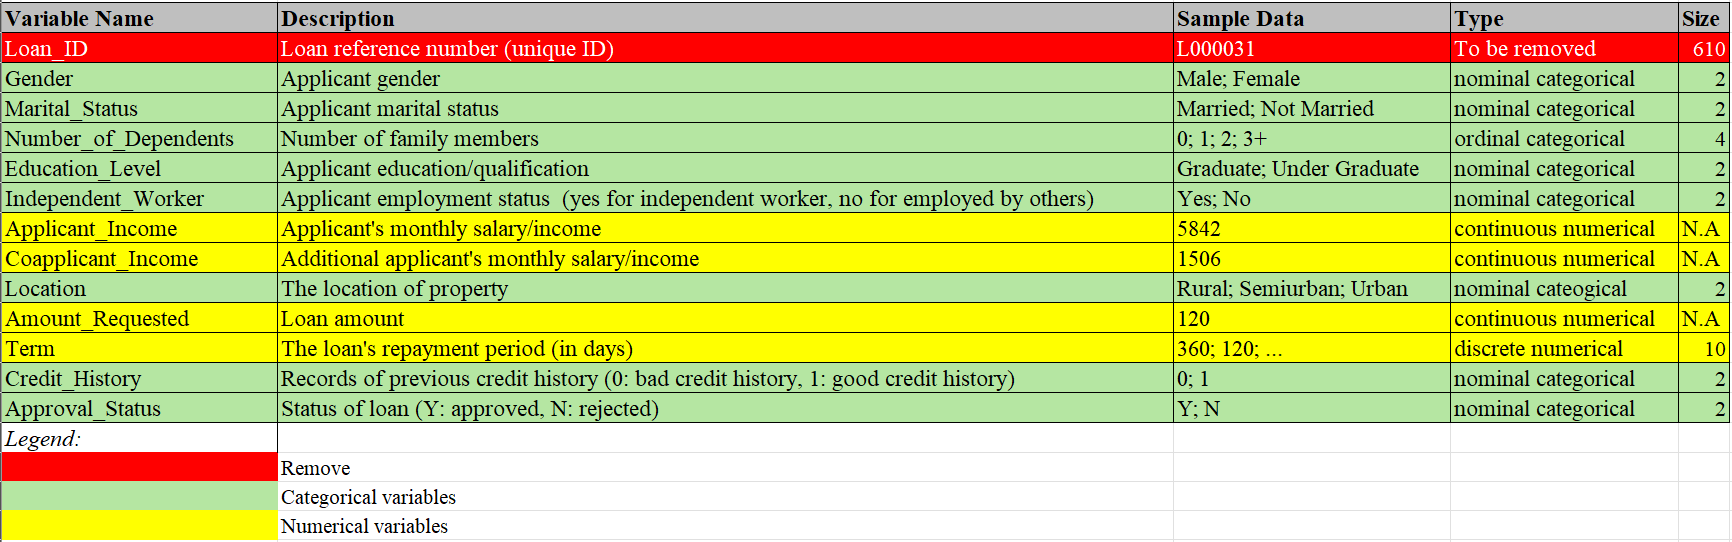

From the dataset summary above, there are several points need further contemplation to decide the type of data.



*   **Loan_ID:** unique identifying keys, to be dropped as meaningless in modeling.
*   **Gender:** nominal categorical variable (size = 2)
* **Marital_Status:** nominal categorical variable (size = 2)
* **Number_of_Dependents:** ordinal categorical variable (size = 4)
* **Education_Level:** nominal categorical variable (size = 2)
* **Independent_Worker:** nominal categorical variable (size = 2)
* **Applicant_Income:** continuous numerical variable
* **Coapplicant_Income:** continuous numerical variable (can combine with the "**Applicant_Income**" to make new variable "**Household_Income**")
* **Location:** nominal cateogical variable (size =3)
* **Amount_Request:** continuous numerical variable
* **Term:** discrete numerical variable -> actually it should be an ordinal categorical variable due to its nature (size = 10)
* **Credit_History:** nominal categorical variable (size = 2)
* **Approval_Status:** nominal categorical variable (size = 2)

(BE CAREFUL!!! This approach to categorise this variable as a ordinal variable may capture the order in relationship between data points. However, it means that the "3+" data points will be converted to numeric values as "3" in integer. The consequences of that approach include failing in capturing the magnitude of difference between data points, and failing in reflecting true numerical relationship between data points. The improvement to avoid those issues is converting data points in that variable to numerical values and setting "3+" to the integer "3".

Making "3+" (three or more children) into "3" can neglect the instances contain more than 3 dependents in a household. The dependents can be dependent children (under 18) or the elder. Statistics from ABS (ABS, n.d.) indicates that the 3 or more dependents category in a household takes a significant proportion in Australia.


## 2.3. Exploratory data analysis (EDA)

### 2.3.1. Getting essential statistics

In [ ]:
# Display the first few rows of the dataset to get an overview
df.head()

Loan_ID Gender Marital_Status Number_of_Dependents Education_Level Independent_Worker  Applicant_Income  Coapplicant_Income   Location  Amount_Requested   Term  Credit_History Approval_Status
0  LP00031   Male            Yes                    0        Graduate                 No              9329                   0      Rural             189.0  180.0             1.0               Y
1  LP00032   Male            Yes                    2        Graduate                 No              2043                1619      Rural             102.0  360.0             1.0               Y
2  LP00033   Male            Yes                    0        Graduate                 No              4754                2331      Urban             129.0  360.0             1.0               Y
3  LP00034   Male             No                    0    Not Graduate                 No              2721                   0      Urban              59.0  180.0             1.0               Y
4  LP00035   Male            Yes                    0        Graduate                 No              2998                3419  Semiurban              56.0  180.0             1.0               Y

In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [ ]:
# As the previous step showed missing values (different non-null counts)
# Check for missing values
df.isnull().sum()

Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64

In [ ]:
# Get descriptive statistics of numerical columns
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
df[numerical_columns].describe()

Applicant_Income  Coapplicant_Income  Amount_Requested        Term
count        610.000000          610.000000        592.000000  596.000000
mean        5415.578689         1622.114754        146.459459  341.879195
std         6126.143268         2935.113192         85.597858   65.322153
min          147.000000            0.000000          9.000000   12.000000
25%         2882.750000            0.000000        101.000000  360.000000
50%         3813.000000         1150.000000        127.500000  360.000000
75%         5793.750000         2299.500000        167.500000  360.000000
max        81000.000000        41667.000000        700.000000  480.000000

In [ ]:
# Check unique values in categorical columns
categorical_columns = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Approval_Status', 'Number_of_Dependents', 'Credit_History']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Gender:
Gender
Male      485
Female    112
Name: count, dtype: int64


Unique values in Marital_Status:
Marital_Status
Yes    395
No     212
Name: count, dtype: int64


Unique values in Education_Level:
Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64


Unique values in Independent_Worker:
Independent_Worker
No     496
Yes     82
Name: count, dtype: int64


Unique values in Location:
Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64


Unique values in Approval_Status:
Approval_Status
Y    418
N    192
Name: count, dtype: int64


Unique values in Number_of_Dependents:
Number_of_Dependents
0     343
1     101
2     100
3+     51
Name: count, dtype: int64


Unique values in Credit_History:
Credit_History
1.0    471
0.0     89
Name: count, dtype: int64




In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print('\n')

Number of duplicate rows: 0




### 2.3.2. Handling missing values

In [ ]:
# After getting insights of the data set, missing values will be handled with
# mode and median filling method

# Fill missing values in nominal categorical variables with mode
nominal_columns = ['Gender', 'Marital_Status', 'Education_Level',
                   'Independent_Worker', 'Location', 'Credit_History']
for col in nominal_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# 'Number_of_Dependents' as ordinal variable
# Fill missing values in 'Number_of_Dependents' with mode, then convert to integer
df['Number_of_Dependents'] = df['Number_of_Dependents'].replace({'3+': 3})
df['Number_of_Dependents'] = df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].mode()[0])
df['Number_of_Dependents'] = df['Number_of_Dependents'].astype(int)

In [ ]:
# 'Credit_History' as nominal variable
df['Credit_History'] = df['Credit_History'].astype(str)

In [ ]:
# Fill missing values in continuous variables with median
df['Applicant_Income'] = df['Applicant_Income'].fillna(df['Applicant_Income'].median())
df['Coapplicant_Income'] = df['Coapplicant_Income'].fillna(df['Coapplicant_Income'].median())
df['Amount_Requested'] = df['Amount_Requested'].fillna(df['Amount_Requested'].median())
df['Term'] = df['Term'].fillna(df['Term'].median())

In [ ]:
# 'Term' as discrete numerical variable
df['Term'] = df['Term'].astype(int)

In [ ]:
# Check for missing values after handling
df.isnull().sum()

Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64

In [ ]:
# Get descriptive statistics of numerical columns after handling missing values
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
df[numerical_columns].describe()

Applicant_Income  Coapplicant_Income  Amount_Requested        Term
count        610.000000          610.000000        610.000000  610.000000
mean        5415.578689         1622.114754        145.900000  342.295082
std         6126.143268         2935.113192         84.384494   64.624047
min          147.000000            0.000000          9.000000   12.000000
25%         2882.750000            0.000000        101.000000  360.000000
50%         3813.000000         1150.000000        127.500000  360.000000
75%         5793.750000         2299.500000        164.750000  360.000000
max        81000.000000        41667.000000        700.000000  480.000000

In [ ]:
# Check unique values in categorical columns after handling missing values
categorical_columns = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Approval_Status', 'Number_of_Dependents', 'Credit_History']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Gender:
Gender
Male      498
Female    112
Name: count, dtype: int64


Unique values in Marital_Status:
Marital_Status
Yes    398
No     212
Name: count, dtype: int64


Unique values in Education_Level:
Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64


Unique values in Independent_Worker:
Independent_Worker
No     528
Yes     82
Name: count, dtype: int64


Unique values in Location:
Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64


Unique values in Approval_Status:
Approval_Status
Y    418
N    192
Name: count, dtype: int64


Unique values in Number_of_Dependents:
Number_of_Dependents
0    358
1    101
2    100
3     51
Name: count, dtype: int64


Unique values in Credit_History:
Credit_History
1.0    521
0.0     89
Name: count, dtype: int64




After handling missing values with mode and median filling in method, the data set is ready to visualise and analyse further.

### 2.3.3. Visualise data and further analyse

#### 2.3.3.a. Univariate analysis

**Univariate Analysis of Categorical Variables**

Bar plots and value counts for categorical variables

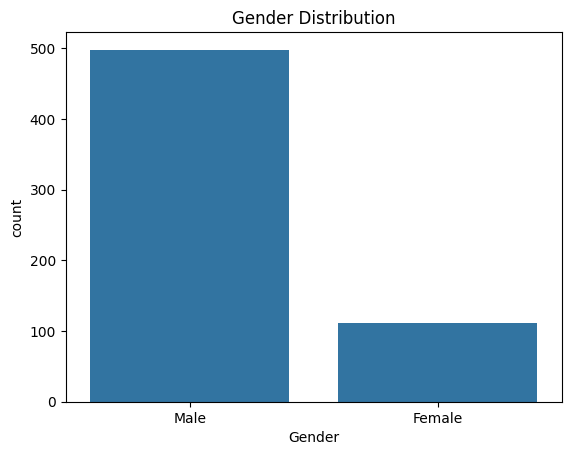

Value counts for Gender:


Gender
Male      498
Female    112
Name: count, dtype: int64

In [ ]:
# Countplot for Gender
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Value counts
print('Value counts for Gender:')
df['Gender'].value_counts()

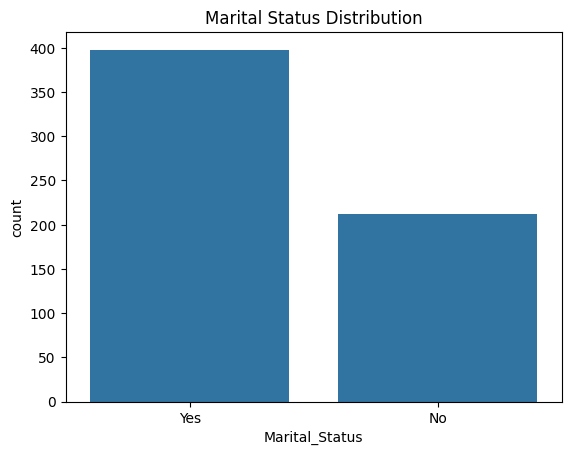

Value counts for Marital Status:


Marital_Status
Yes    398
No     212
Name: count, dtype: int64

In [ ]:
# Countplot for Marital_Status
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.show()

# Value counts
print('Value counts for Marital Status:')
df['Marital_Status'].value_counts()

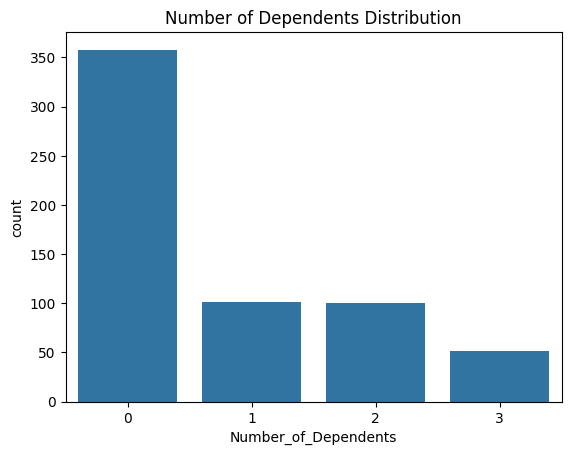

Value counts for Number of Dependents:


Number_of_Dependents
0    358
1    101
2    100
3     51
Name: count, dtype: int64

In [ ]:
# Number_of_Dependents is a ordinal variable. Therefore, "3+" values will be converted into integer "3".

# Countplot for Number_of_Dependents
sns.countplot(data=df, x='Number_of_Dependents')
plt.title('Number of Dependents Distribution')
plt.show()

# Value counts
print('Value counts for Number of Dependents:')
df['Number_of_Dependents'].value_counts()

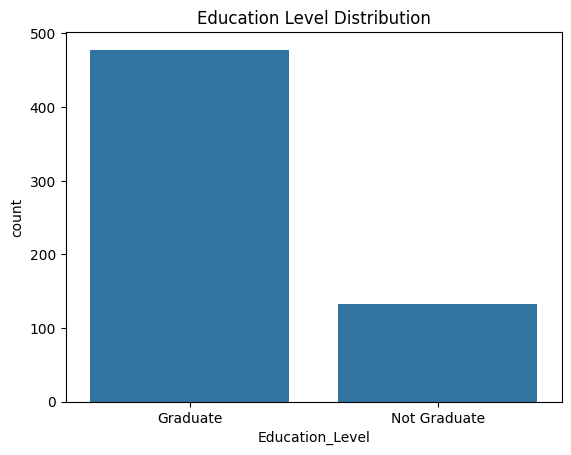

Value counts for Education Level:


Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64

In [ ]:
# Countplot for Education_Level
sns.countplot(data=df, x='Education_Level')
plt.title('Education Level Distribution')
plt.show()

# Value counts
print('Value counts for Education Level:')
df['Education_Level'].value_counts()

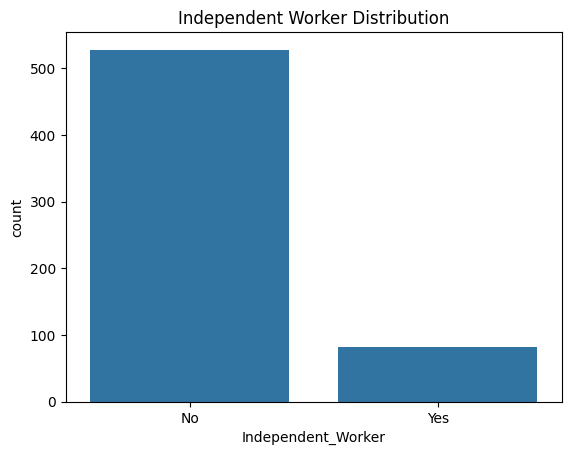

Value counts for Independent Worker:


Independent_Worker
No     528
Yes     82
Name: count, dtype: int64

In [ ]:
# Countplot for Independent_Worker
sns.countplot(data=df, x='Independent_Worker')
plt.title('Independent Worker Distribution')
plt.show()

# Value counts
print('Value counts for Independent Worker:')
df['Independent_Worker'].value_counts()

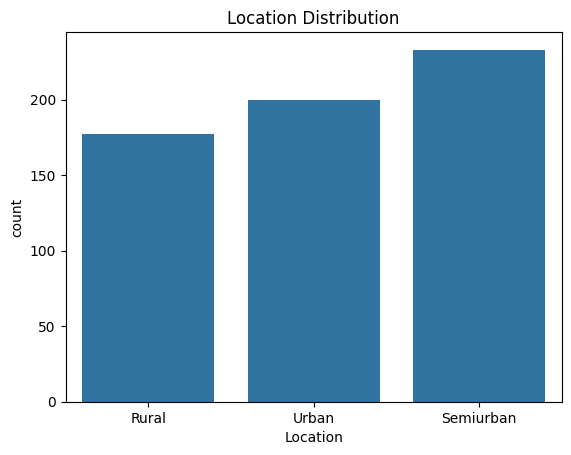

Value counts for Location:


Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64

In [ ]:
# Countplot for Location
sns.countplot(data=df, x='Location')
plt.title('Location Distribution')
plt.show()

# Value counts
print('Value counts for Location:')
df['Location'].value_counts()

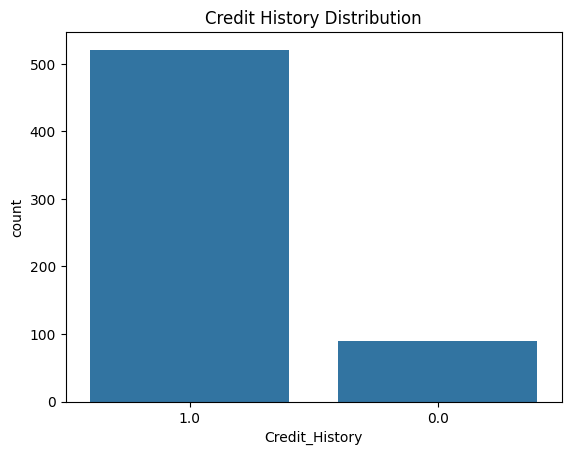

Value counts for Credit History:


Credit_History
1.0    521
0.0     89
Name: count, dtype: int64

In [ ]:
# Countplot for Credit_History
sns.countplot(data=df, x='Credit_History')
plt.title('Credit History Distribution')
plt.show()

# Value counts
print('Value counts for Credit History:')
df['Credit_History'].value_counts()

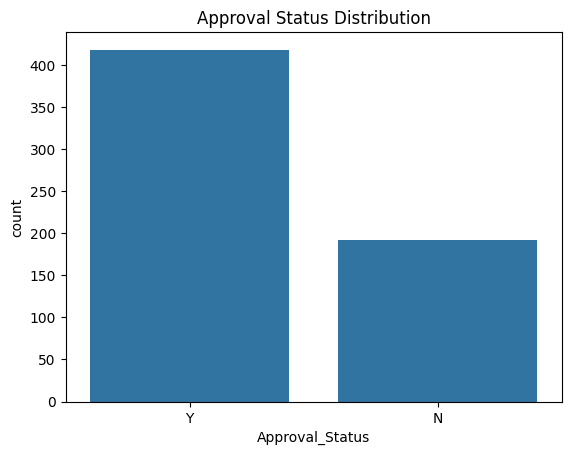

Value counts for Approval Status:


Approval_Status
Y    418
N    192
Name: count, dtype: int64

In [ ]:
# Countplot for Approval_Status
sns.countplot(data=df, x='Approval_Status')
plt.title('Approval Status Distribution')
plt.show()

# Value counts
print('Value counts for Approval Status:')
df['Approval_Status'].value_counts()

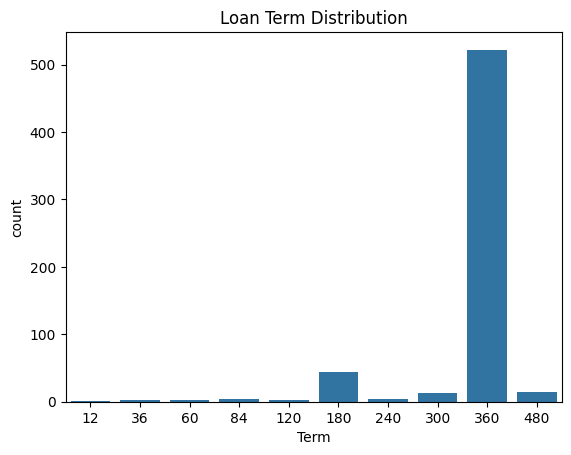

Value counts for Term:


Term
360    522
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: count, dtype: int64

In [ ]:
# Countplot for Term as discrete numerical variable
sns.countplot(data=df, x='Term')
plt.title('Loan Term Distribution')
plt.show()

# Value counts
print('Value counts for Term:')
df['Term'].value_counts()

**Univariate Analysis of Numerical Variables**

Histograms and summary statistics for numerical variables

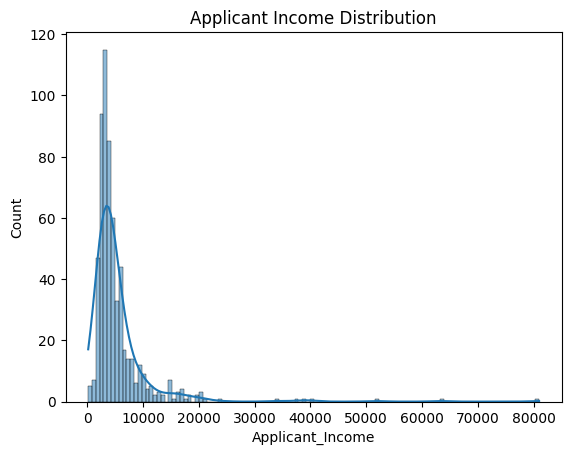

Summary statistics for Applicant Income


count      610.000000
mean      5415.578689
std       6126.143268
min        147.000000
25%       2882.750000
50%       3813.000000
75%       5793.750000
max      81000.000000
Name: Applicant_Income, dtype: float64

In [ ]:
# Histogram for Applicant_Income
sns.histplot(df['Applicant_Income'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Applicant Income')
df['Applicant_Income'].describe()

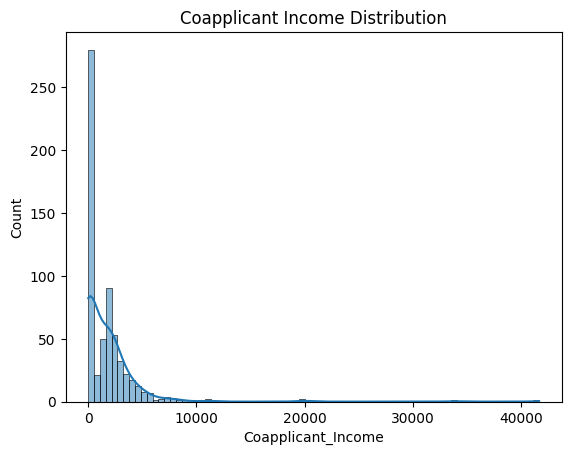

Summary statistics for Coapplicant Income


count      610.000000
mean      1622.114754
std       2935.113192
min          0.000000
25%          0.000000
50%       1150.000000
75%       2299.500000
max      41667.000000
Name: Coapplicant_Income, dtype: float64

In [ ]:
# Histogram for Coapplicant_Income
sns.histplot(df['Coapplicant_Income'], kde=True)
plt.title('Coapplicant Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Coapplicant Income')
df['Coapplicant_Income'].describe()

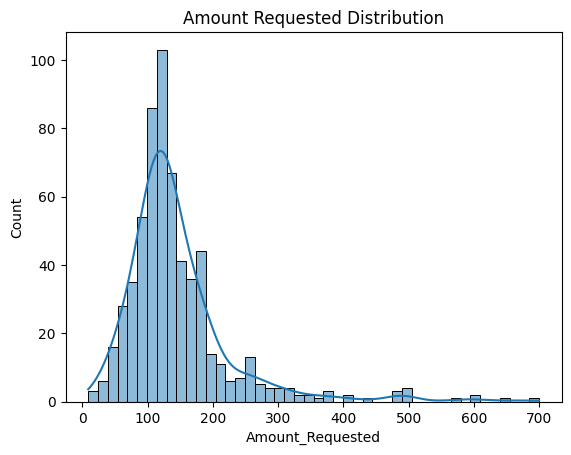

Summary statistics for Amount Requested


count    610.000000
mean     145.900000
std       84.384494
min        9.000000
25%      101.000000
50%      127.500000
75%      164.750000
max      700.000000
Name: Amount_Requested, dtype: float64

In [ ]:
# Histogram for Amount_Request
sns.histplot(df['Amount_Requested'], kde=True)
plt.title('Amount Requested Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Amount Requested')
df['Amount_Requested'].describe()

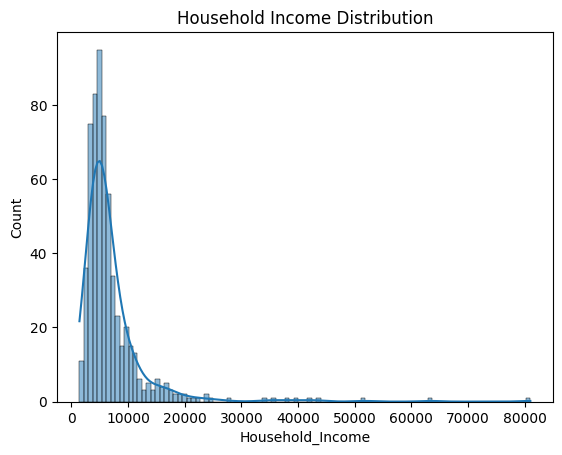

Summary statistics for Household_Income


count      610.000000
mean      7037.693443
std       6477.841166
min       1440.000000
25%       4168.250000
50%       5417.000000
75%       7537.250000
max      81000.000000
Name: Household_Income, dtype: float64

In [ ]:
# Create a new column for Household_Income
df['Household_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

# Histogram for Household_Income
sns.histplot(df['Household_Income'], kde=True)
plt.title('Household Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Household_Income')
df['Household_Income'].describe()

#### 2.3.3.b. Bivariate analysis

**Nominal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

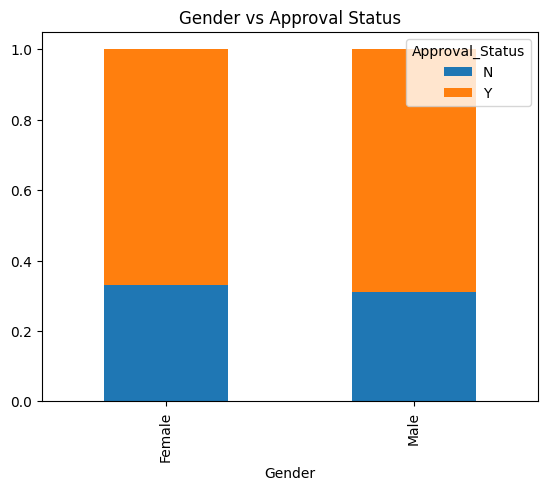

In [ ]:
### Bivariate Analysis: Gender vs Approval Status
# Crosstab
pd.crosstab(df['Gender'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Gender'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Gender vs Approval Status')
plt.show()

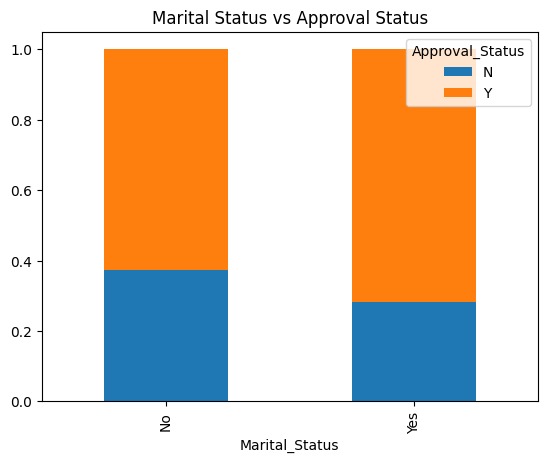

In [ ]:
### Bivariate Analysis: Gender vs Approval Status
# Crosstab
pd.crosstab(df['Marital_Status'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Marital_Status'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Marital Status vs Approval Status')
plt.show()

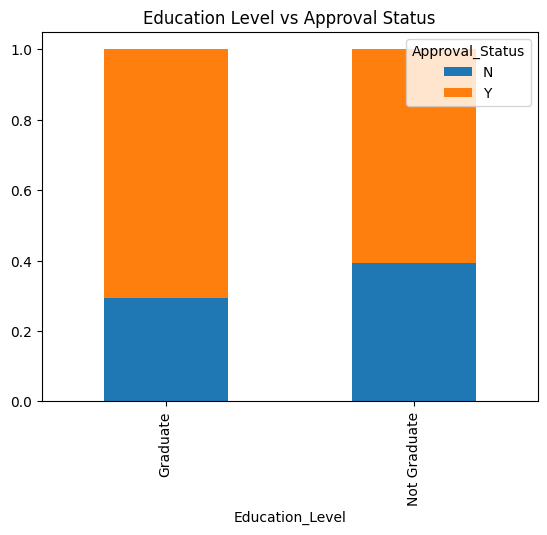

In [ ]:
### Bivariate Analysis: Education Level vs Approval Status
# Crosstab
pd.crosstab(df['Education_Level'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Education_Level'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Education Level vs Approval Status')
plt.show()

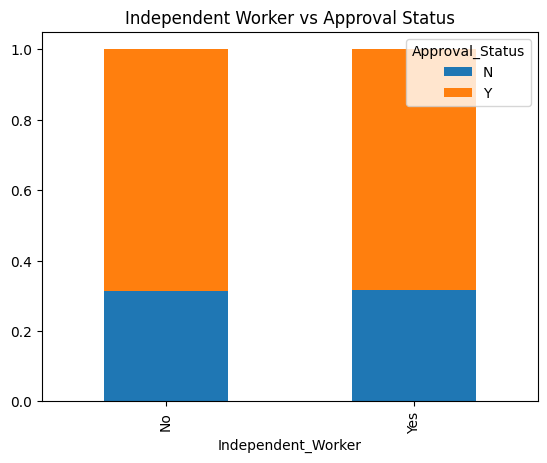

In [ ]:
### Bivariate Analysis: Independent Worker vs Approval Status
# Crosstab
pd.crosstab(df['Independent_Worker'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Independent_Worker'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Independent Worker vs Approval Status')
plt.show()

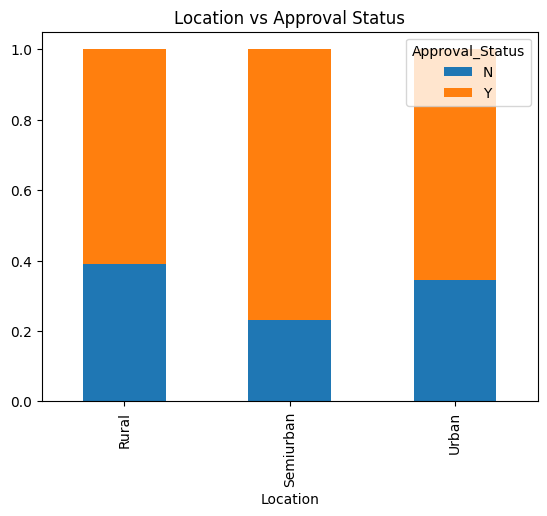

In [ ]:
### Bivariate Analysis: Location vs Approval Status
# Crosstab
pd.crosstab(df['Location'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Location'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Location vs Approval Status')
plt.show()

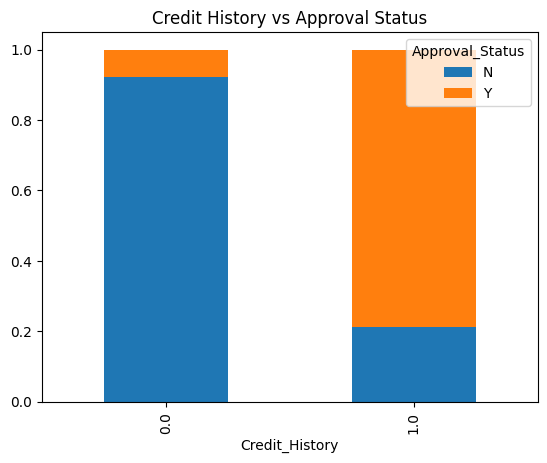

In [ ]:
### Bivariate Analysis: Credit History vs Approval Status
# Crosstab
pd.crosstab(df['Credit_History'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Credit_History'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Credit History vs Approval Status')
plt.show()

**Ordinal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

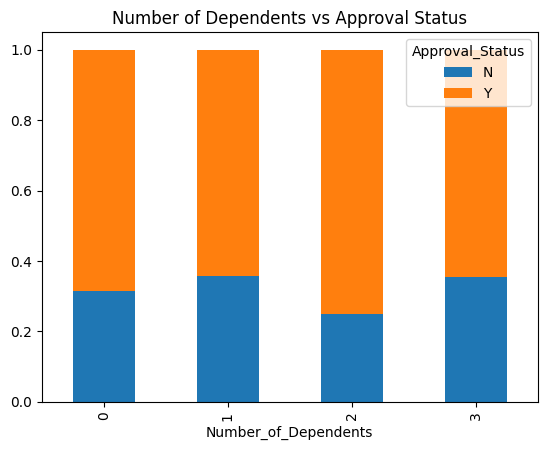

In [ ]:
### Bivariate Analysis: Number of Dependents vs Approval Status
# Crosstab
pd.crosstab(df['Number_of_Dependents'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Number_of_Dependents'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Number of Dependents vs Approval Status')
plt.show()

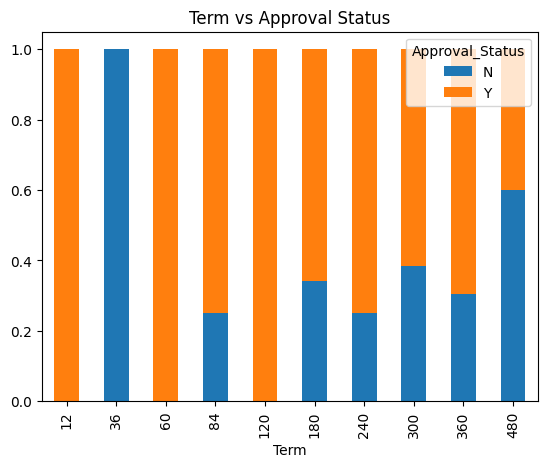

In [ ]:
### Bivariate Analysis: Term vs Approval Status
# Crosstab
pd.crosstab(df['Term'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Term'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Term vs Approval Status')
plt.show()

**Numerical variables vs. Amount Requested**

Scatter plots to visualize correlations and Pearson's correlation coefficients to quantify relationships

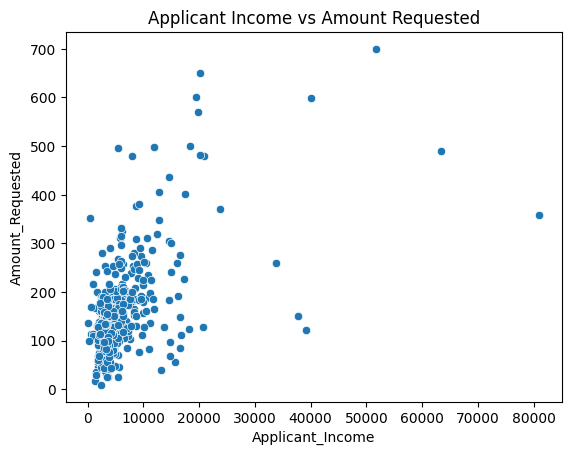

Applicant_Income  Amount_Requested
Applicant_Income          1.000000          0.564488
Amount_Requested          0.564488          1.000000

In [ ]:
### Bivariate Analysis: Applicant Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Applicant_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Applicant_Income', 'Amount_Requested']].corr()

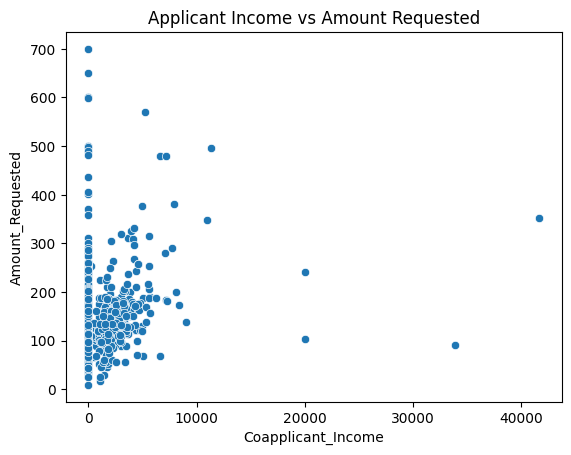

Coapplicant_Income  Amount_Requested
Coapplicant_Income            1.000000          0.190008
Amount_Requested              0.190008          1.000000

In [ ]:
### Bivariate Analysis: Coapplicant Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Coapplicant_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Coapplicant_Income', 'Amount_Requested']].corr()

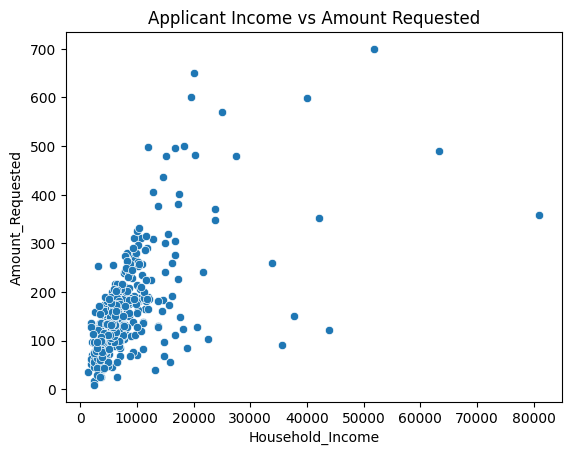

Household_Income  Amount_Requested
Household_Income          1.000000          0.619933
Amount_Requested          0.619933          1.000000

In [ ]:
### Bivariate Analysis: Household Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Household_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Household_Income', 'Amount_Requested']].corr()

**Numerical variables vs. target variable**

Box plots to visualize the distribution and groupby and aggregation to summarize the data with statistics like mean, median, etc

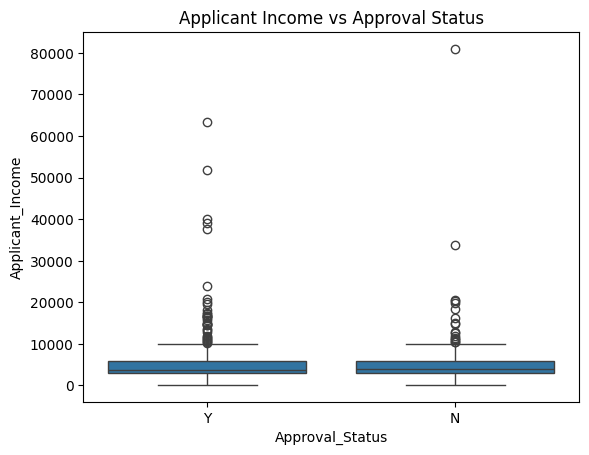

Approval_Status
N    5446.119792
Y    5401.550239
Name: Applicant_Income, dtype: float64

In [ ]:
### Bivariate Analysis: Applicant Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Applicant_Income', data=df)
plt.title('Applicant Income vs Approval Status')
plt.show()

# Groupby mean Applicant_Income for each Approval_Status
df.groupby('Approval_Status')['Applicant_Income'].mean()

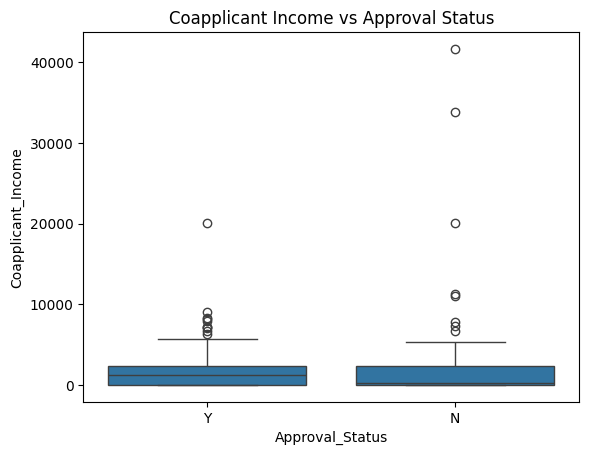

Approval_Status
N    1877.875000
Y    1504.636364
Name: Coapplicant_Income, dtype: float64

In [ ]:
### Bivariate Analysis: Coapplicant Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Coapplicant_Income', data=df)
plt.title('Coapplicant Income vs Approval Status')
plt.show()

# Groupby mean Coapplicant_Income for each Approval_Status
df.groupby('Approval_Status')['Coapplicant_Income'].mean()

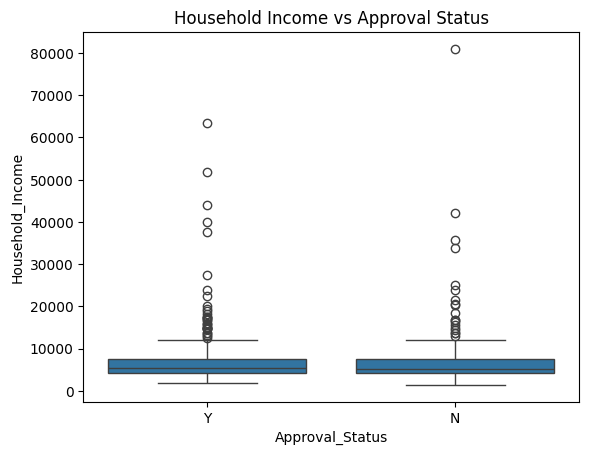

Approval_Status
N    7323.994792
Y    6906.186603
Name: Household_Income, dtype: float64

In [ ]:
### Bivariate Analysis: Household Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Household_Income', data=df)
plt.title('Household Income vs Approval Status')
plt.show()

# Groupby mean Household_Income for each Approval_Status
df.groupby('Approval_Status')['Household_Income'].mean()

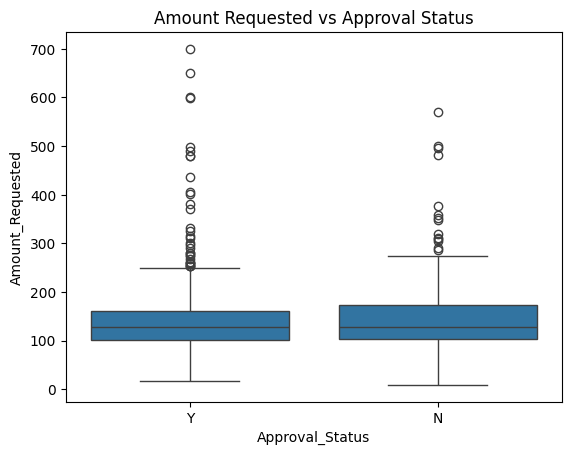

Approval_Status
N    149.903646
Y    144.061005
Name: Amount_Requested, dtype: float64

In [ ]:
### Bivariate Analysis: Amount Requested vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Amount_Requested', data=df)
plt.title('Amount Requested vs Approval Status')
plt.show()

# Groupby mean Amount_Request for each Approval_Status
df.groupby('Approval_Status')['Amount_Requested'].mean()

#### 2.3.3.c. Multivariate analysis

**Numerical Variables**

Pair Plot with hue as Approval_Status

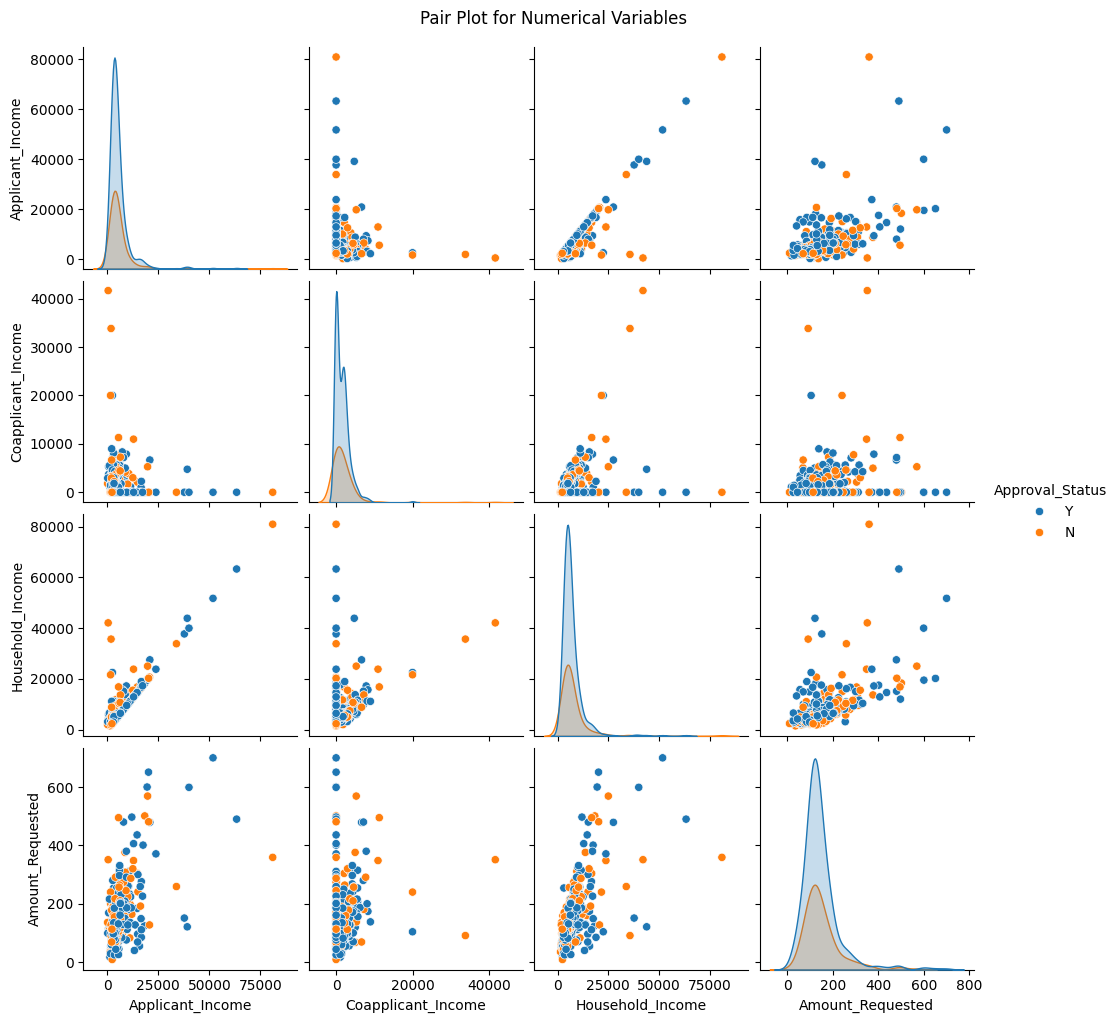

In [ ]:
### Multivariate Analysis: Pair Plot for Numerical Variables
# Select only numerical variables
numerical_vars = ['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested']

# Pair plot with hue as Approval_Status
sns.pairplot(df[numerical_vars + ['Approval_Status']], hue='Approval_Status', diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

Heatmap of Correlations

Correlation between the numerical variables

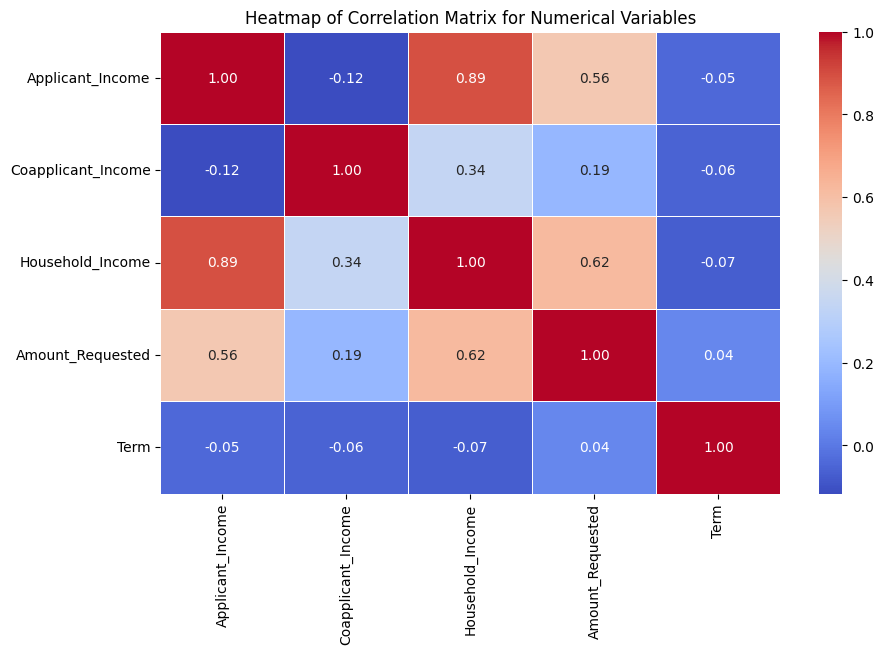

In [ ]:
### Multivariate Analysis: Heatmap of Correlation Matrix (Numerical Variables)
# Correlation matrix
corr_matrix = df[['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested', 'Term']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Variables')
plt.show()


**Categorical Variables and Numerical Variables**

Violin plots or box plots to visualize how a categorical variable interacts with a numerical variable colored by the target variable

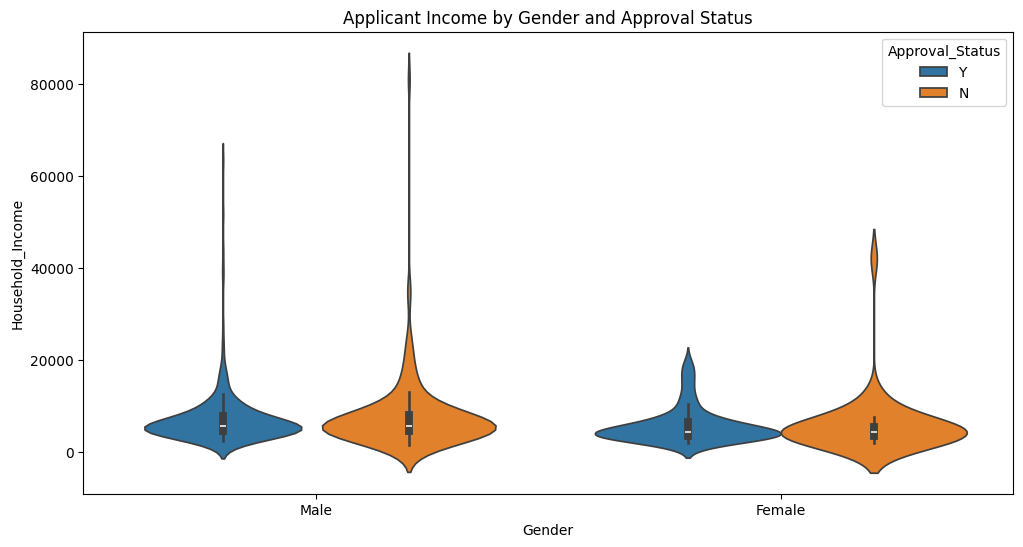

In [ ]:
### Multivariate Analysis: Violin Plot (Categorical vs Numerical vs Approval Status)
# Gender
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Gender and Approval Status')
plt.show()

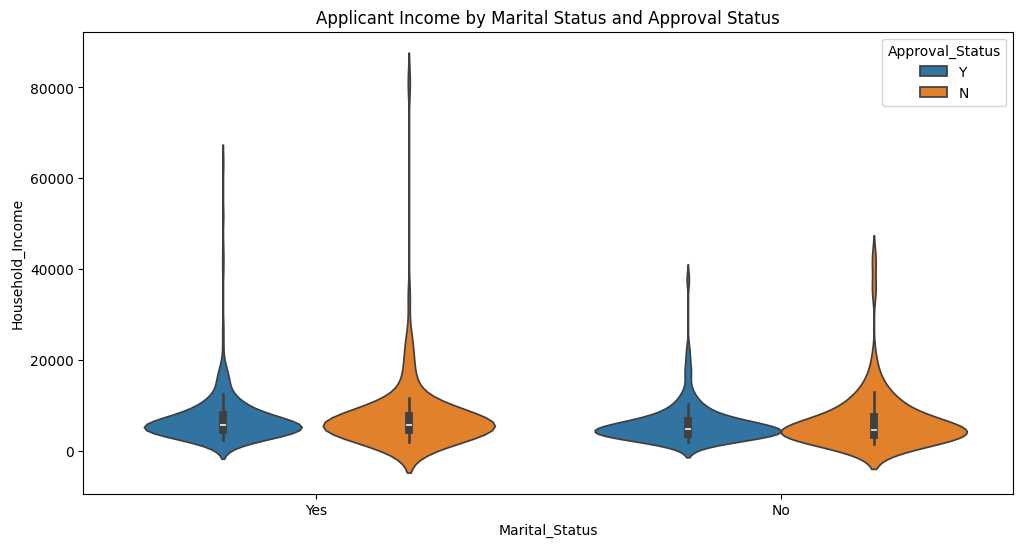

In [ ]:
# Marital_Status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Marital Status and Approval Status')
plt.show()

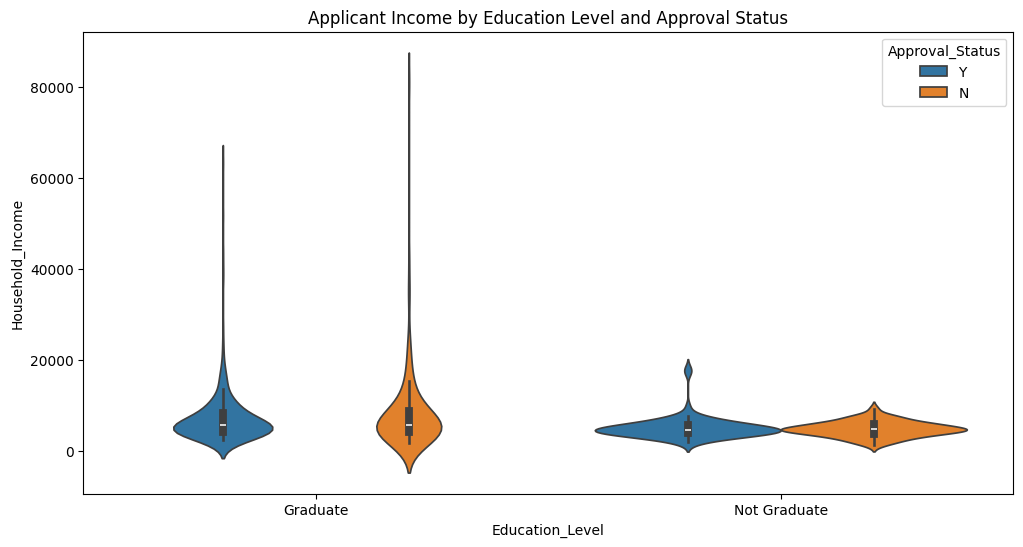

In [ ]:
# Education_Level
plt.figure(figsize=(12, 6))
sns.violinplot(x='Education_Level', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Education Level and Approval Status')
plt.show()

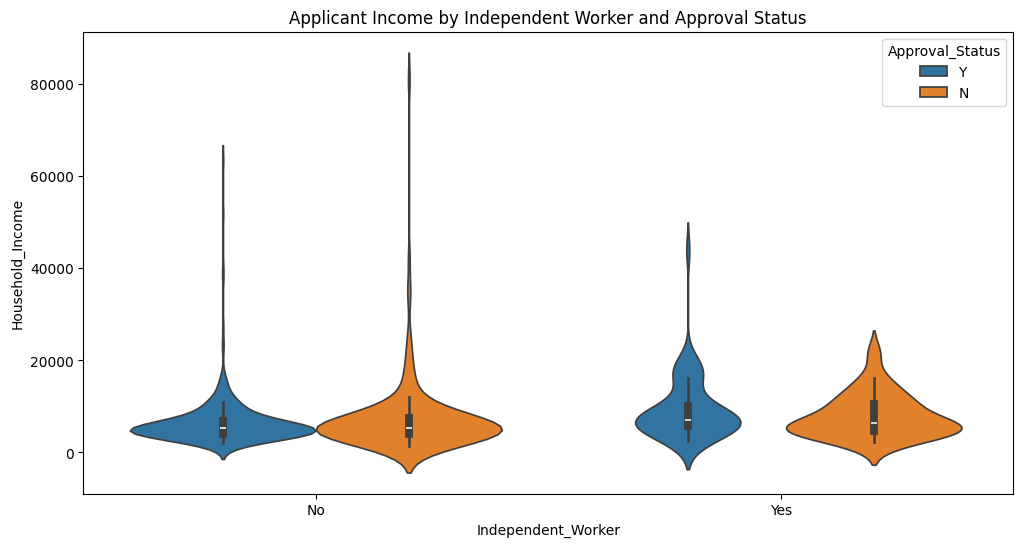

In [ ]:
# Independent_Worker
plt.figure(figsize=(12, 6))
sns.violinplot(x='Independent_Worker', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Independent Worker and Approval Status')
plt.show()

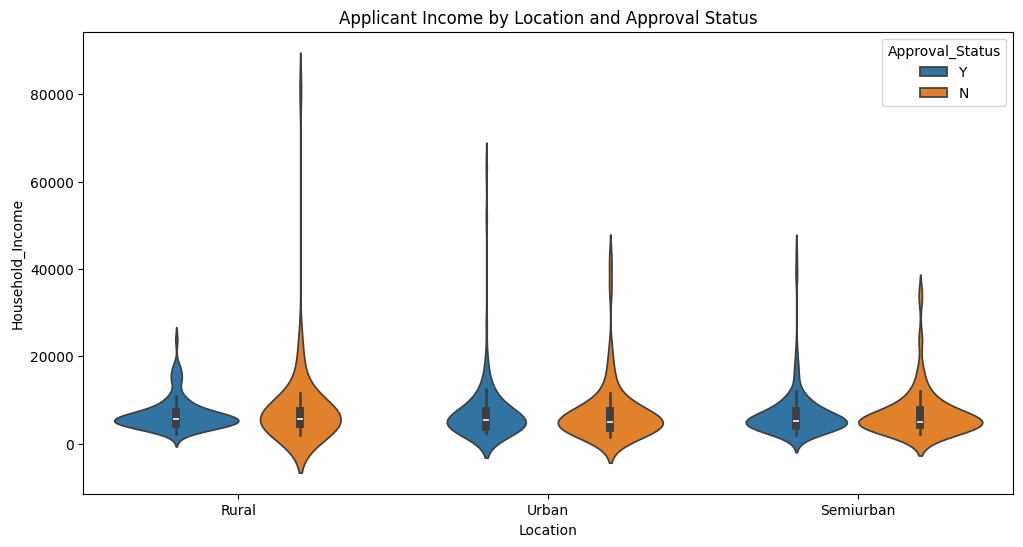

In [ ]:
# Location
plt.figure(figsize=(12, 6))
sns.violinplot(x='Location', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Location and Approval Status')
plt.show()

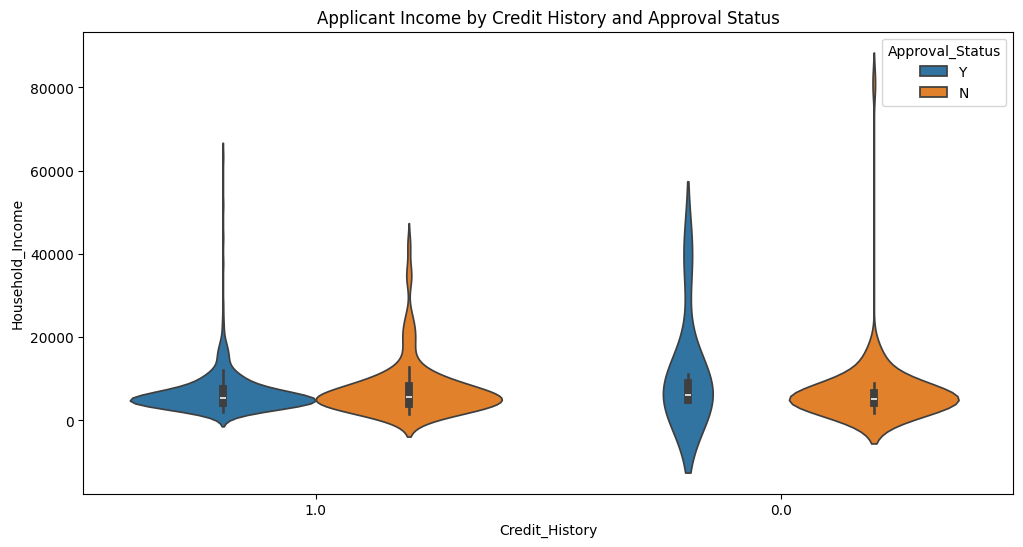

In [ ]:
# Credit_History
plt.figure(figsize=(12, 6))
sns.violinplot(x='Credit_History', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Credit History and Approval Status')
plt.show()

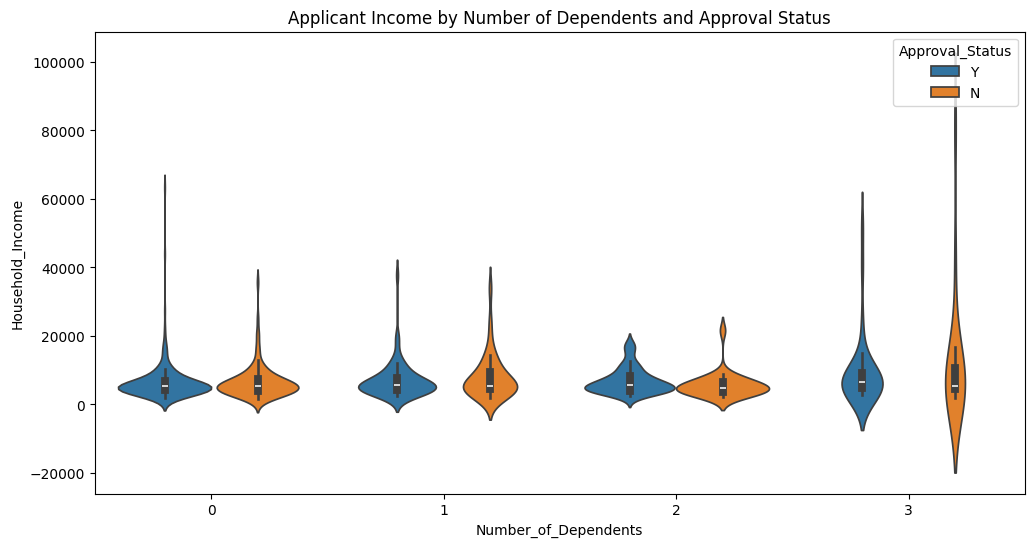

In [ ]:
# Number_of_Dependents
plt.figure(figsize=(12, 6))
sns.violinplot(x='Number_of_Dependents', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Number of Dependents and Approval Status')
plt.show()

# 3. Data preprocessing

**Objective: Clean, transform, and prepare data for modeling**

## 3.1. Detecting and handling Outliers

From the statistics after filling in missing values with mode and median in section **2.2. Handling Missing Values** and the visualisation of data in section **2.3. Visualising Data and Further Analyses**, the characteristics of the data should be examined to decide appropriate methods to detect and handle outliers. There are heavy outliers in the numerical variables and the distribution of data within those variables are strongly skewed.

In [ ]:
# Assessing skewness for df
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested'] # Remove 'Term' as it does not benefit outliers analysis
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed.")

Skewness of Applicant_Income: 6.521836068699207
Applicant_Income is highly skewed.
Skewness of Coapplicant_Income: 7.473035941592677
Coapplicant_Income is highly skewed.
Skewness of Household_Income: 5.614491388656663
Household_Income is highly skewed.
Skewness of Amount_Requested: 2.73157209205283
Amount_Requested is highly skewed.


**IQR method**

The steps start with IQR Method. Given the dataset characteristics, beginning with the IQR method is a straightforward and robust approach.

In [ ]:
# IQR method to detect outliers in Applicant_Income variable
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Applicant_Income = df[(df['Applicant_Income'] < lower_bound) | (df['Applicant_Income'] > upper_bound)].copy()

In [ ]:
print(outliers_Applicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 18 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               50 non-null     object 
 1   Gender                50 non-null     object 
 2   Marital_Status        50 non-null     object 
 3   Number_of_Dependents  50 non-null     int64  
 4   Education_Level       50 non-null     object 
 5   Independent_Worker    50 non-null     object 
 6   Applicant_Income      50 non-null     int64  
 7   Coapplicant_Income    50 non-null     int64  
 8   Location              50 non-null     object 
 9   Amount_Requested      50 non-null     float64
 10  Term                  50 non-null     int64  
 11  Credit_History        50 non-null     object 
 12  Approval_Status       50 non-null     object 
 13  Household_Income      50 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ KB
None


In [ ]:
# IQR method to detect outliers in Coapplicant_Income variable
Q1 = df['Coapplicant_Income'].quantile(0.25)
Q3 = df['Coapplicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Coapplicant_Income = df[(df['Coapplicant_Income'] < lower_bound) | (df['Coapplicant_Income'] > upper_bound)].copy()

In [ ]:
print(outliers_Coapplicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 29 to 606
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               18 non-null     object 
 1   Gender                18 non-null     object 
 2   Marital_Status        18 non-null     object 
 3   Number_of_Dependents  18 non-null     int64  
 4   Education_Level       18 non-null     object 
 5   Independent_Worker    18 non-null     object 
 6   Applicant_Income      18 non-null     int64  
 7   Coapplicant_Income    18 non-null     int64  
 8   Location              18 non-null     object 
 9   Amount_Requested      18 non-null     float64
 10  Term                  18 non-null     int64  
 11  Credit_History        18 non-null     object 
 12  Approval_Status       18 non-null     object 
 13  Household_Income      18 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ KB
None


In [ ]:
# IQR method to detect outliers in Household_Income variable
Q1 = df['Household_Income'].quantile(0.25)
Q3 = df['Household_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Household_Income = df[(df['Household_Income'] < lower_bound) | (df['Household_Income'] > upper_bound)].copy()

In [ ]:
print(outliers_Coapplicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 29 to 606
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               18 non-null     object 
 1   Gender                18 non-null     object 
 2   Marital_Status        18 non-null     object 
 3   Number_of_Dependents  18 non-null     int64  
 4   Education_Level       18 non-null     object 
 5   Independent_Worker    18 non-null     object 
 6   Applicant_Income      18 non-null     int64  
 7   Coapplicant_Income    18 non-null     int64  
 8   Location              18 non-null     object 
 9   Amount_Requested      18 non-null     float64
 10  Term                  18 non-null     int64  
 11  Credit_History        18 non-null     object 
 12  Approval_Status       18 non-null     object 
 13  Household_Income      18 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ KB
None


In [ ]:
# IQR method to detect outliers in Amount_Requested variable
Q1 = df['Amount_Requested'].quantile(0.25)
Q3 = df['Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Amount_Requested = df[(df['Amount_Requested'] < lower_bound) | (df['Amount_Requested'] > upper_bound)].copy()

In [ ]:
print(outliers_Amount_Requested.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 6 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               42 non-null     object 
 1   Gender                42 non-null     object 
 2   Marital_Status        42 non-null     object 
 3   Number_of_Dependents  42 non-null     int64  
 4   Education_Level       42 non-null     object 
 5   Independent_Worker    42 non-null     object 
 6   Applicant_Income      42 non-null     int64  
 7   Coapplicant_Income    42 non-null     int64  
 8   Location              42 non-null     object 
 9   Amount_Requested      42 non-null     float64
 10  Term                  42 non-null     int64  
 11  Credit_History        42 non-null     object 
 12  Approval_Status       42 non-null     object 
 13  Household_Income      42 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 4.9+ KB
None


In [ ]:
# IQR method to detect outliers in Term variable
Q1 = df['Term'].quantile(0.25)
Q3 = df['Term'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Term = df[(df['Term'] < lower_bound) | (df['Term'] > upper_bound)].copy()

In [ ]:
print(outliers_Term.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               88 non-null     object 
 1   Gender                88 non-null     object 
 2   Marital_Status        88 non-null     object 
 3   Number_of_Dependents  88 non-null     int64  
 4   Education_Level       88 non-null     object 
 5   Independent_Worker    88 non-null     object 
 6   Applicant_Income      88 non-null     int64  
 7   Coapplicant_Income    88 non-null     int64  
 8   Location              88 non-null     object 
 9   Amount_Requested      88 non-null     float64
 10  Term                  88 non-null     int64  
 11  Credit_History        88 non-null     object 
 12  Approval_Status       88 non-null     object 
 13  Household_Income      88 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.3+ KB
None


Outliers detected by IQR method vary in many different rows. Therefore, Isolation Forest method will be applied next.

**Isolation Forest**

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import IsolationForest

In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

In [ ]:
# Fit the model on the numerical columns of the DataFrame
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested', 'Term']
iso_forest.fit(df[numerical_columns])

IsolationForest(random_state=42)

In [ ]:
# Predict outliers (-1 denotes an outlier, 1 denotes an inlier)
outliers = iso_forest.predict(df[numerical_columns])

In [ ]:
# Create a new DataFrame to store the outliers
outliers_IS = df[outliers == -1].copy()

In [ ]:
# Reset the index of the outliers DataFrame for cleaner output
outliers_IS.reset_index(drop=True, inplace=True)

In [ ]:
# Count the number of outliers and inliers detected by the Isolation Forest
outlier_count = (outliers == -1).sum()
inlier_count = (outliers == 1).sum()

In [ ]:
print(f'Number of outliers detected: {outlier_count}')
print(f'Number of inliers detected: {inlier_count}')

Number of outliers detected: 55
Number of inliers detected: 555


In [ ]:
# Display the DataFrame containing the outliers
print("Outliers detected by Isolation Forest:")
print(outliers_IS.info())
print(outliers_IS.head())

Outliers detected by Isolation Forest:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               55 non-null     object 
 1   Gender                55 non-null     object 
 2   Marital_Status        55 non-null     object 
 3   Number_of_Dependents  55 non-null     int64  
 4   Education_Level       55 non-null     object 
 5   Independent_Worker    55 non-null     object 
 6   Applicant_Income      55 non-null     int64  
 7   Coapplicant_Income    55 non-null     int64  
 8   Location              55 non-null     object 
 9   Amount_Requested      55 non-null     float64
 10  Term                  55 non-null     int64  
 11  Credit_History        55 non-null     object 
 12  Approval_Status       55 non-null     object 
 13  Household_Income      55 non-null     int64  
dtypes: float64(1), int64(5), object(8)
me

**Combine all outliers detected by IQR and Isolation Forest with flags**

In [ ]:
# Add flags to each outlier DataFrame
outliers_Applicant_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Coapplicant_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Household_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Amount_Requested.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Term.loc[:, 'Outlier_Method'] = 'IQR'
outliers_IS.loc[:, 'Outlier_Method'] = 'Isolation Forest'

In [ ]:
# Flag individual outlier values for IQR method
outliers_Applicant_Income.loc[:, 'Flag'] = 'Applicant_Income'
outliers_Coapplicant_Income.loc[:, 'Flag'] = 'Coapplicant_Income'
outliers_Household_Income.loc[:, 'Flag'] = 'Household_Income'
outliers_Amount_Requested.loc[:, 'Flag'] = 'Amount_Requested'
outliers_Term.loc[:, 'Flag'] = 'Term'

In [ ]:
# Combine all outlier DataFrames
combined_outliers = pd.concat([
    outliers_Applicant_Income,
    outliers_Coapplicant_Income,
    outliers_Household_Income,
    outliers_Amount_Requested,
    outliers_Term,
    outliers_IS
], ignore_index=True)

In [ ]:
# Remove duplicate rows if they exist
combined_outliers.drop_duplicates(inplace=True)

In [ ]:
# Reset index for cleaner output
combined_outliers.reset_index(drop=True, inplace=True)

In [ ]:
combined_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               303 non-null    object 
 1   Gender                303 non-null    object 
 2   Marital_Status        303 non-null    object 
 3   Number_of_Dependents  303 non-null    int64  
 4   Education_Level       303 non-null    object 
 5   Independent_Worker    303 non-null    object 
 6   Applicant_Income      303 non-null    int64  
 7   Coapplicant_Income    303 non-null    int64  
 8   Location              303 non-null    object 
 9   Amount_Requested      303 non-null    float64
 10  Term                  303 non-null    int64  
 11  Credit_History        303 non-null    object 
 12  Approval_Status       303 non-null    object 
 13  Household_Income      303 non-null    int64  
 14  Outlier_Method        303 non-null    object 
 15  Flag                  2

In [ ]:
# Export the combined_outliers DataFrame to a CSV file
combined_outliers.to_csv('combined_outliers.csv', index=False)
print("Combined outliers have been exported to 'combined_outliers.csv'.")

Combined outliers have been exported to 'combined_outliers.csv'.


**KEEP ALL OUTLIERS IN NUMERICAL COLUMNS**

As the outliers in numerical columns are critical to the loan approval process, no single heavy outlier is removed from the data set. The transformation approach will be used to mitigate any potential negative impacts of heavy outliers on the data's readiness for modeling.

The further analyses of outliers detected by IQR and Isolation Forest methods are in **Appendix A** below.

## 3.2. Fairness Analysis

Fairness in machine learning systems refers to the principle that decisions made by these
systems should not discriminate or be biased against individuals or groups based on their
race, gender, ethnicity, religion, or other personal characteristics.

In section **2.3.b. Bivariate Analysis**, the visualisation of "Gender" showed that there is no significant difference in approval ratio (Yes/ No) between two groups of male and female. However, is is necessary to analyse further the demographic parity (approval rates for males and females) and the equal opportunity (proportion of approved loans among qualified applicants across genders). Additional demographic variables  like "Marital_Status", "Education_Level", and "Location" are examined also to ensure that the distribution of approval status across other demographic variables are reasonable, eliminating any potential biases accidently introduced into the modeling step.

**Demographic Parity**

The approval rates for males and females should be approximately equal.

In [ ]:
# Demographic Parity for Gender
approved_male = df[(df['Gender'] == 'Male') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Gender'] == 'Male'].shape[0]
approved_female = df[(df['Gender'] == 'Female') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Gender'] == 'Female'].shape[0]

In [ ]:
print(f"Approval Rate for Males: {approved_male:.2f}")
print(f"Approval Rate for Females: {approved_female:.2f}")

Approval Rate for Males: 0.69
Approval Rate for Females: 0.67


In [ ]:
# Demographic Parity for Marital_Status
approved_single = df[(df['Marital_Status'] == 'No') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Marital_Status'] == 'No'].shape[0]
approved_marriaged = df[(df['Marital_Status'] == 'Yes') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Marital_Status'] == 'Yes'].shape[0]

In [ ]:
print(f"Approval Rate for Single/ Not marriaged (No): {approved_single:.2f}")
print(f"Approval Rate for Marriaged (Yes): {approved_marriaged:.2f}")

Approval Rate for Single/ Not marriaged (No): 0.63
Approval Rate for Marriaged (Yes): 0.72


In [ ]:
# Demographic Parity for Education_Level
approved_Graduate = df[(df['Education_Level'] == 'Graduate') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Education_Level'] == 'Graduate'].shape[0]
approved_Not_Graduate = df[(df['Education_Level'] == 'Not Graduate') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Education_Level'] == 'Not Graduate'].shape[0]

In [ ]:
print(f"Approval Rate for Graduate: {approved_Graduate:.2f}")
print(f"Approval Rate for Not Graduate: {approved_Not_Graduate:.2f}")

Approval Rate for Graduate: 0.71
Approval Rate for Not Graduate: 0.61


In [ ]:
# Demographic Parity for Location
approved_Rural = df[(df['Location'] == 'Rural') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Rural'].shape[0]
approved_Semiurban = df[(df['Location'] == 'Semiurban') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Semiurban'].shape[0]
approved_Urban = df[(df['Location'] == 'Urban') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Urban'].shape[0]

In [ ]:
print(f"Approval Rate for Rural: {approved_Rural:.2f}")
print(f"Approval Rate for Semiurban: {approved_Semiurban:.2f}")
print(f"Approval Rate for Urban: {approved_Urban:.2f}")

Approval Rate for Rural: 0.61
Approval Rate for Semiurban: 0.77
Approval Rate for Urban: 0.66


**Equal Opportunity**

The proportion of approved loans among qualified applicants (e.g., those with good credit history) should be similar across genders.

In [ ]:
# Convert Credit_History to numeric, handling errors if non-numeric values are present
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')

In [ ]:
# Equal Opportunity for Gender (considering only those with Credit History of 1.0 as "qualified")
qualified_male_approval = df[(df['Gender'] == 'Male') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Gender'] == 'Male') & (df['Credit_History'] == 1.0)].shape[0]
qualified_female_approval = df[(df['Gender'] == 'Female') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Gender'] == 'Female') & (df['Credit_History'] == 1.0)].shape[0]

In [ ]:
print(f"Equal Opportunity for Qualified Males: {qualified_male_approval:.2f}")
print(f"Equal Opportunity for Qualified Females: {qualified_female_approval:.2f}")

Equal Opportunity for Qualified Males: 0.79
Equal Opportunity for Qualified Females: 0.78


In [ ]:
# Equal Opportunity for Marital_Status (considering only those with Credit History of 1.0 as "qualified")
qualified_married_approval = df[(df['Marital_Status'] == 'Yes') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Marital_Status'] == 'Yes') & (df['Credit_History'] == 1.0)].shape[0]
qualified_single_approval = df[(df['Marital_Status'] == 'No') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Marital_Status'] == 'No') & (df['Credit_History'] == 1.0)].shape[0]

In [ ]:
print(f"Equal Opportunity for Qualified Married: {qualified_married_approval:.2f}")
print(f"Equal Opportunity for Qualified Single: {qualified_single_approval:.2f}")

Equal Opportunity for Qualified Married: 0.82
Equal Opportunity for Qualified Single: 0.72


In [ ]:
# Equal Opportunity for Education_Level (considering only those with Credit History of 1.0 as "qualified")
qualified_Graduate_approval = df[(df['Education_Level'] == 'Graduate') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Education_Level'] == 'Graduate') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Not_Graduate_approval = df[(df['Education_Level'] == 'Not Graduate') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Education_Level'] == 'Not Graduate') & (df['Credit_History'] == 1.0)].shape[0]

In [ ]:
print(f"Equal Opportunity for Qualified Graduate: {qualified_Graduate_approval:.2f}")
print(f"Equal Opportunity for Qualified Not Graduate: {qualified_Not_Graduate_approval:.2f}")

Equal Opportunity for Qualified Graduate: 0.80
Equal Opportunity for Qualified Not Graduate: 0.75


In [ ]:
# Equal Opportunity for Location (considering only those with Credit History of 1.0 as "qualified")
qualified_Urban_approval = df[(df['Location'] == 'Urban') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Urban') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Semiurban_approval = df[(df['Location'] == 'Semiurban') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Semiurban') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Rural_approval = df[(df['Location'] == 'Rural') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Rural') & (df['Credit_History'] == 1.0)].shape[0]

In [ ]:
print(f"Equal Opportunity for Qualified Urban: {qualified_Urban_approval:.2f}")
print(f"Equal Opportunity for Qualified Semiurban: {qualified_Semiurban_approval:.2f}")
print(f"Equal Opportunity for Qualified Rural: {qualified_Rural_approval:.2f}")

Equal Opportunity for Qualified Urban: 0.77
Equal Opportunity for Qualified Semiurban: 0.86
Equal Opportunity for Qualified Rural: 0.71


There is no tremendous issue in fairness analysis.

## 3.3. Feature engineering

Feature engineering preprocesses raw data into a machine-readable format. Feature engineering in ML consists of four main steps: Feature Creation, Transformations, Feature Extraction, and Feature Selection.

The initial variables (or features) were explored in section **1.4. Understanding the Dataset Structure** and section **2.1. Getting Essential Statistics**. The step of feature engineering tries to extract, explore, and well establish a group of features to use in the modeling to gain more useful insights from the raw data.

**Step 1: Feature Creation**

Generating new features from existing ones to capture more information and uncover hidden relationships.

There are so many factors affecting loan approval as shown in a quick search on the Internet above. The data set does not reveal the purpose of the loan, but we can assume that they are home loans, other household loans, and individual loans accordingly to the variable "Marital_Status".



Cheung, Baumber & Brown (2022) stated that interdependencies and relationships between factors mean they cannot be perceived or addressed in isolation in the context of home loans in an Australian retail bank.

Zhang & Deng (2019) used variables such as Gender, Level of education, Number of years of employment, Household income, and Total debt in multiple linear regression to analyse the impact of those independent variables towards the British householders' Loan Approval. Therefore, combining Household_Income from two variables **Applicant_Income** and **Coapplicant_Income** has strong base evidence. In the light of the demographical setting of Zhang & Deng (2019), variables like **Independent_Worker** and **Marital_Status** may have some interaction with other variables such as **Education_Level**, **Applicant_Income**, **Coapplicant_Income**, and **Number_of_Dependents** because of their natural relationships and facts. For instance, an applicant may be an independent worker without any higher education and not married, leading to a positive applicant income and a zero co-applicant income. Therefore, it is crucial to investigate further into the relationships and interactions between variables and towards target variables to discover latent insights from the classification modelling.

Bangura & Lee (2023) also suggested that the location (urban, semiurban, and rural) may have some affects on the housing finance in Australia, which is indirectly related to the context of this work. Therefore, it is necessary to add Location variable into the feature engineering steps to discover potentials relationships and/or affects towards the target variable.

**Interaction Features**

In [ ]:
# Education_Level x Independent_Worker
df['Edu_Worker_Interaction'] = df['Education_Level'].astype(str) + '_' + df['Independent_Worker'].astype(str)

In [ ]:
print(df['Edu_Worker_Interaction'].head())

0        Graduate_No
1        Graduate_No
2        Graduate_No
3    Not Graduate_No
4        Graduate_No
Name: Edu_Worker_Interaction, dtype: object


In [ ]:
# Marital_Status x Independent_Worker
df['Marital_Worker_Interaction'] = df['Marital_Status'].astype(str) + '_' + df['Independent_Worker'].astype(str)

In [ ]:
print(df['Marital_Worker_Interaction'].head())

0    Yes_No
1    Yes_No
2    Yes_No
3     No_No
4    Yes_No
Name: Marital_Worker_Interaction, dtype: object


In [ ]:
# Independent_Worker x Credit_History
df['Worker_Credit_Interaction'] = df['Independent_Worker'].astype(str) + '_' + df['Credit_History'].astype(str)

In [ ]:
print(df['Worker_Credit_Interaction'].head())

0    No_1.0
1    No_1.0
2    No_1.0
3    No_1.0
4    No_1.0
Name: Worker_Credit_Interaction, dtype: object


In [ ]:
# Gender x Credit_History
df['Gender_Credit_Interaction'] = df['Gender'].astype(str) + '_' + df['Credit_History'].astype(str)

In [ ]:
print(df['Gender_Credit_Interaction'].head())

0    Male_1.0
1    Male_1.0
2    Male_1.0
3    Male_1.0
4    Male_1.0
Name: Gender_Credit_Interaction, dtype: object


In [ ]:
# Household_Income x Credit_History
df['Income_Credit_Interaction'] = df['Household_Income'] * df['Credit_History']

In [ ]:
print(df['Income_Credit_Interaction'].head(10))

0    9329.0
1    3662.0
2    7085.0
3    2721.0
4    6417.0
5    6316.0
6       0.0
7       0.0
8    4886.0
9    3080.0
Name: Income_Credit_Interaction, dtype: float64


In [ ]:
# Debt_to_Income ratio (DTI) = Monthly debt payment / Monthly household income
# This DTI is not back-end or front-end as no sufficient and accurate data
# Assume that the Amount_Requested values were truncated by dividing 100
# That approach makes the DTI sense while ensuring the magnitude and significance of the DTI
# In short, DTI does not carry the absolute meaning of the value of the data points within
df['Debt_to_Income'] = (((df['Amount_Requested'] * 100) / (df['Term']/30)) / df['Household_Income']) * 100

In [ ]:
print(df['Debt_to_Income'].head())

0    33.765677
1    23.211360
2    15.172900
3    36.138675
4    14.544699
Name: Debt_to_Income, dtype: float64


**Step 2: Feature Transformation**

Improving the feature scale, handling skewness, and enabling better model performance

In [ ]:
# Assessing skewness in numerical columns
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed and may require transformation.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed and may benefit from transformation.")

Skewness of Applicant_Income: 6.521836068699207
Applicant_Income is highly skewed and may require transformation.
Skewness of Coapplicant_Income: 7.473035941592677
Coapplicant_Income is highly skewed and may require transformation.
Skewness of Household_Income: 5.614491388656663
Household_Income is highly skewed and may require transformation.
Skewness of Amount_Requested: 2.73157209205283
Amount_Requested is highly skewed and may require transformation.
Skewness of Term: -2.3908335966522354
Term is highly skewed and may require transformation.


**Log Transformation for numerical variables**

In [ ]:
#Apply log transformation to numerical columns
df['Applicant_Income_Log'] = np.log1p(df['Applicant_Income'])
df['Coapplicant_Income_Log'] = np.log1p(df['Coapplicant_Income'])
df['Household_Income_Log'] = np.log1p(df['Household_Income'])
df['Amount_Requested_Log'] = np.log1p(df['Amount_Requested'])
df['Term_Log']=np.log1p(df['Term'])

In [ ]:
# Assess skewness in numerical columns after log transformation
numerical_columns_log = ['Applicant_Income_Log',
                         'Coapplicant_Income_Log',
                         'Household_Income_Log',
                         'Amount_Requested_Log',
                         'Term_Log']
for column in numerical_columns_log:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed and may require transformation.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed and may benefit from transformation.")

Skewness of Applicant_Income_Log: 0.4739706117829893
Skewness of Coapplicant_Income_Log: -0.16731974062634702
Skewness of Household_Income_Log: 1.069270150803231
Household_Income_Log is highly skewed and may require transformation.
Skewness of Amount_Requested_Log: -0.15400752569495352
Skewness of Term_Log: -4.784163434402919
Term_Log is highly skewed and may require transformation.


In [ ]:
# Apply square root transformation to Household_Income and Term
df['Household_Income_Sqrt'] = np.sqrt(df['Household_Income'])
df['Term_Sqrt'] = np.sqrt(df['Term'])

In [ ]:
# Apply cube root transformation to Household_Income and Term
df['Household_Income_Cbrt'] = np.cbrt(df['Household_Income'])
df['Term_Cbrt'] = np.cbrt(df['Term'])

In [ ]:
# Apply Box-Cox transformation to Household_Income and Term
from scipy import stats
df['Household_Income_Boxcox'], _ = stats.boxcox(df['Household_Income'])
df['Term_Boxcox'], _ = stats.boxcox(df['Term'])

In [ ]:
# Check the skewness of Household_Income after square root, cube root, and Box-Cox transformations
print("Skewness of Household_Income_Sqrt:", df['Household_Income_Sqrt'].skew())
print("Skewness of Term_Sqrt:", df['Term_Sqrt'].skew())
print("Skewness of Household_Income_Cbrt:", df['Household_Income_Cbrt'].skew())
print("Skewness of Term_Cbrt:", df['Term_Cbrt'].skew())
print("Skewness of Household_Income_Boxcox:", df['Household_Income_Boxcox'].skew())
print("Skewness of Term_Boxcox:", df['Term_Boxcox'].skew())

Skewness of Household_Income_Sqrt: 2.8042355682493936
Skewness of Term_Sqrt: -3.1686959285350715
Skewness of Household_Income_Cbrt: 2.119824409739196
Skewness of Term_Cbrt: -3.563869224684575
Skewness of Household_Income_Boxcox: -0.03331061447981636
Skewness of Term_Boxcox: 0.381029585237578


In [ ]:
df.drop([
    'Household_Income_Sqrt',
    'Term_Sqrt',
    'Term_Cbrt',
    'Household_Income_Cbrt',
    'Household_Income_Log',
    'Term_Log'
], axis=1, inplace=True)

In [ ]:
# As Household_Income transformed using Box-Cox
# Re calculate Household_Income x Credit_History
df['Income_Credit_Interaction'] = df['Household_Income_Boxcox'] * df['Credit_History']

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan_ID                     610 non-null    object 
 1   Gender                      610 non-null    object 
 2   Marital_Status              610 non-null    object 
 3   Number_of_Dependents        610 non-null    int64  
 4   Education_Level             610 non-null    object 
 5   Independent_Worker          610 non-null    object 
 6   Applicant_Income            610 non-null    int64  
 7   Coapplicant_Income          610 non-null    int64  
 8   Location                    610 non-null    object 
 9   Amount_Requested            610 non-null    float64
 10  Term                        610 non-null    int64  
 11  Credit_History              610 non-null    float64
 12  Approval_Status             610 non-null    object 
 13  Household_Income            610 non

**Step 3: Feature Extraction**

Why Use Transformed Columns:
Stabilized Variance: Log and Box-Cox transformations reduce the effect of outliers and stabilize variance. Using these transformed variables in polynomial features ensures that the relationships captured by interaction terms are based on data with a more normal distribution.

Better Model Performance: Polynomial features can magnify skewed data if you use untransformed variables, which might lead to poor model performance or overfitting. By using log-transformed and Box-Cox-transformed features, you're creating polynomial interactions on a more stable, less skewed dataset.

Consistency: You've already made an effort to preprocess the data for skewness and outliers. Using the original columns would reintroduce the issues that the transformations were meant to solve.

In [ ]:
# Use the transformed columns in the polynomial feature steps
numerical_columns = ['Applicant_Income_Log',
                     'Coapplicant_Income_Log',
                     'Amount_Requested_Log',
                     'Household_Income_Boxcox',
                     'Term_Boxcox']
print(numerical_columns)

['Applicant_Income_Log', 'Coapplicant_Income_Log', 'Amount_Requested_Log', 'Household_Income_Boxcox', 'Term_Boxcox']


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(df[numerical_columns])

In [ ]:
# The shape of the polynomial features
print(poly_features.shape)  # Should show (610, 16)
print(poly_features[:5, :])  # View the first 5 rows of the polynomial features

(610, 16)
[[1.00000000e+00 9.14099029e+00 0.00000000e+00 5.24702407e+00
  1.99089039e+00 2.06253304e+06 0.00000000e+00 4.79629961e+01
  1.81987098e+01 1.88535945e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.04462498e+01 1.08221605e+07 4.10627721e+06]
 [1.00000000e+00 7.62266395e+00 7.39018143e+00 4.63472899e+00
  1.97821663e+00 1.66401340e+07 5.63328696e+01 3.53289816e+01
  1.50792806e+01 1.26842149e+08 3.42514881e+01 1.46193798e+01
  1.22973609e+08 9.16849798e+00 7.71225113e+07 3.29177898e+07]
 [1.00000000e+00 8.46695197e+00 7.75448155e+00 4.86753445e+00
  1.98775114e+00 1.66401340e+07 6.56568229e+01 4.12131804e+01
  1.68301935e+01 1.40891215e+08 3.77452061e+01 1.54139796e+01
  1.29035612e+08 9.67544717e+00 8.09964254e+07 3.30764454e+07]
 [1.00000000e+00 7.90912218e+00 0.00000000e+00 4.09434456e+00
  1.97279336e+00 2.06253304e+06 0.00000000e+00 3.23826714e+01
  1.56030638e+01 1.63128258e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.07729578e+00 8.44472093e+06 4.06895149

In [ ]:
# Define the new column names based on the features generated
poly_feature_names = [
    'Bias',  # Bias term (constant)
    'Applicant_Income_Log',
    'Coapplicant_Income_Log',
    'Amount_Requested_Log',
    'Household_Income_Boxcox',
    'Term_Boxcox',  # Added for completeness
    'Applicant_Coapplicant_Interaction',  # Interaction between Applicant_Income_Log and Coapplicant_Income_Log
    'Applicant_Amount_Requested_Interaction',  # Interaction between Applicant_Income_Log and Amount_Requested_Log
    'Applicant_Household_Interaction',  # Interaction between Applicant_Income_Log and Household_Income_Boxcox
    'Coapplicant_Amount_Requested_Interaction',  # Interaction between Coapplicant_Income_Log and Amount_Requested_Log
    'Coapplicant_Household_Interaction',  # Interaction between Coapplicant_Income_Log and Household_Income_Boxcox
    'Amount_Household_Interaction'  # Interaction between Amount_Requested_Log and Household_Income_Boxcox
]

# Adjust the poly_feature_names to match the generated features
poly_feature_names = poly.get_feature_names_out(numerical_columns)

# Convert the polynomial features into a DataFrame with the new column names
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Display the first few rows of the new polynomial feature DataFrame
print(poly_df.head())

     1  Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Household_Income_Boxcox   Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
0  1.0              9.140990                0.000000              5.247024                 1.990890  2.062533e+06                                     0.000000                                  47.962996                                     18.198710                      1.885359e+07                                     0.000000                                        0.000000                        0.000000e+00                                     10.446250                

In [ ]:
# Drop the bias term
poly_df = poly_df.drop(columns=[poly_feature_names[0]])  # Bias term

In [ ]:
# Concatenate with the original dataframe
df = pd.concat([df, poly_df], axis=1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Applicant_Income                                610 non-null    int64  
 7   Coapplicant_Income                              610 non-null    int64  
 8   Location                                        610 non-null    object 
 9   Amount_Requested                           

**PCA for Dimensionality Reduction**

**Step 1: Standardize the Data**

 This ensures that all numerical features have a mean of 0 and a standard deviation of 1, making PCA more effective.

In [ ]:
# Reload the numerical_columns to capture all newly created variables
numerical_columns = [
    'Applicant_Income_Log',                            # Transformed
    'Coapplicant_Income_Log',                          # Transformed
    'Amount_Requested_Log',                            # Transformed
    'Household_Income_Boxcox',                         # Transformed
    'Term_Boxcox',                                     # Transformed
    'Applicant_Income_Log Coapplicant_Income_Log',     # Interaction
    'Applicant_Income_Log Amount_Requested_Log',       # Interaction
    'Applicant_Income_Log Household_Income_Boxcox',    # Interaction
    'Applicant_Income_Log Term_Boxcox',                # Interaction
    'Coapplicant_Income_Log Amount_Requested_Log',     # Interaction
    'Coapplicant_Income_Log Household_Income_Boxcox',  # Interaction
    'Coapplicant_Income_Log Term_Boxcox',              # Interaction
    'Amount_Requested_Log Household_Income_Boxcox',    # Interaction
    'Amount_Requested_Log Term_Boxcox',                # Interaction
    'Household_Income_Boxcox Term_Boxcox'              # Interaction
]

In [ ]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the standardized data
print(df[numerical_columns].head())

   Applicant_Income_Log  Applicant_Income_Log  Coapplicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Amount_Requested_Log  Household_Income_Boxcox  Household_Income_Boxcox  Term_Boxcox  Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
0              1.235657              1.235657               -1.104704               -1.104704              0.773632              0.773632                 0.957876                 0.957876    -2.307121    -2.307121                                    -1.098162                                   1.110870                                      1.236971                         

In [ ]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Verify the columns have been correctly cleaned
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Applicant_Income                                610 non-null    int64  
 7   Coapplicant_Income                              610 non-null    int64  
 8   Location                                        610 non-null    object 
 9   Amount_Requested                           

**Step 2: Apply PCA for Dimensionality Reduction**

There are 2 approaches when it comes to PCA for dimentionality reduction. The first approach is pre-determining the ratio of explained variance. The second approach is visualizing the ratio of explained variance by the number of components and choosing manually. The following code blocks use the second approach.

In [ ]:
# Select only numerical columns for PCA
numerical_columns = [
    'Applicant_Income_Log',                            # Transformed
    'Coapplicant_Income_Log',                          # Transformed
    'Amount_Requested_Log',                            # Transformed
    'Household_Income_Boxcox',                         # Transformed
    'Term_Boxcox',                                     # Transformed
    'Applicant_Income_Log Coapplicant_Income_Log',     # Interaction
    'Applicant_Income_Log Amount_Requested_Log',       # Interaction
    'Applicant_Income_Log Household_Income_Boxcox',    # Interaction
    'Applicant_Income_Log Term_Boxcox',                # Interaction
    'Coapplicant_Income_Log Amount_Requested_Log',     # Interaction
    'Coapplicant_Income_Log Household_Income_Boxcox',  # Interaction
    'Coapplicant_Income_Log Term_Boxcox',              # Interaction
    'Amount_Requested_Log Household_Income_Boxcox',    # Interaction
    'Amount_Requested_Log Term_Boxcox',                # Interaction
    'Household_Income_Boxcox Term_Boxcox'              # Interaction
]

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA to your numerical columns
pca = PCA()  # Start without setting n_components to analyze all components
pca.fit(df[numerical_columns])

PCA()

In [ ]:
# Check explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

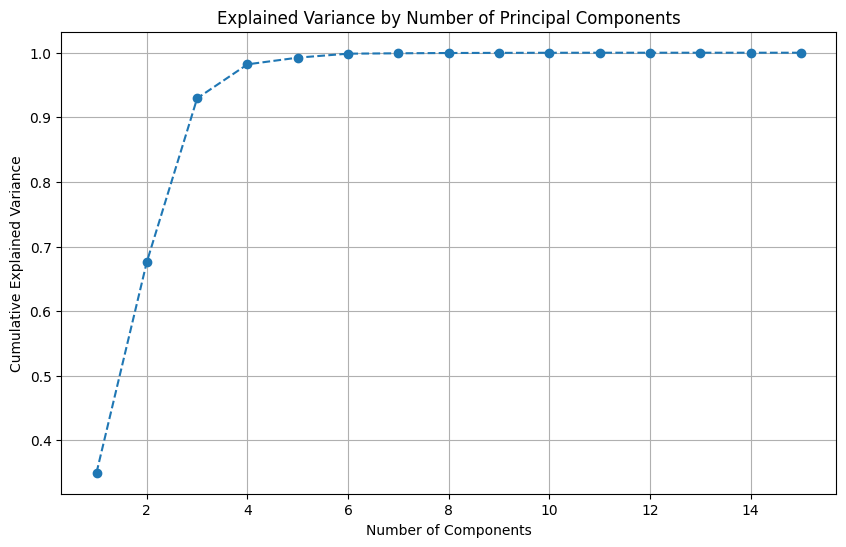

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

According to the plot above, number of components = 6 to retain 100% of the variance.

In [ ]:
# Based on the plot, choose the number of components
pca = PCA(n_components=4) # 4 components
pca_features = pca.fit_transform(df[numerical_columns])

In [ ]:
# Print the explained variance ratios of these components
print("Explained variance per component:", pca.explained_variance_ratio_)

Explained variance per component: [0.34984758 0.32632885 0.25322569 0.05262473]


The first component explains 35% of the variance.

The second component explains 32.63% of the variance.

The third component explains 25.32% of the variance.

The fourth component explains 5.2% of the variance.

Thr fifth component explains 1% of the variance.

The sixth component explains 0.6% of the variance.

In [ ]:
# Convert PCA features into a DataFrame for better readability
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [ ]:
# Concatenate PCA features back into the original dataframe
df = pd.concat([df, pca_df], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Applicant_Income                                610 non-null    int64  
 7   Coapplicant_Income                              610 non-null    int64  
 8   Location                                        610 non-null    object 
 9   Amount_Requested                           

**Step 3: Interpret and Visualise Components**

In [ ]:
# Get the PCA component loadings
pca_loadings = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [ ]:
# Display the loadings for each principal component
print(pca_loadings)

      Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Household_Income_Boxcox  Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
PCA1             -0.232825                0.416877              0.013506                 0.007211     0.099834                                     0.408968                                  -0.111629                                     -0.225323                          0.051404                                     0.411695                                        0.416694                            0.407274                                      0.013002                      

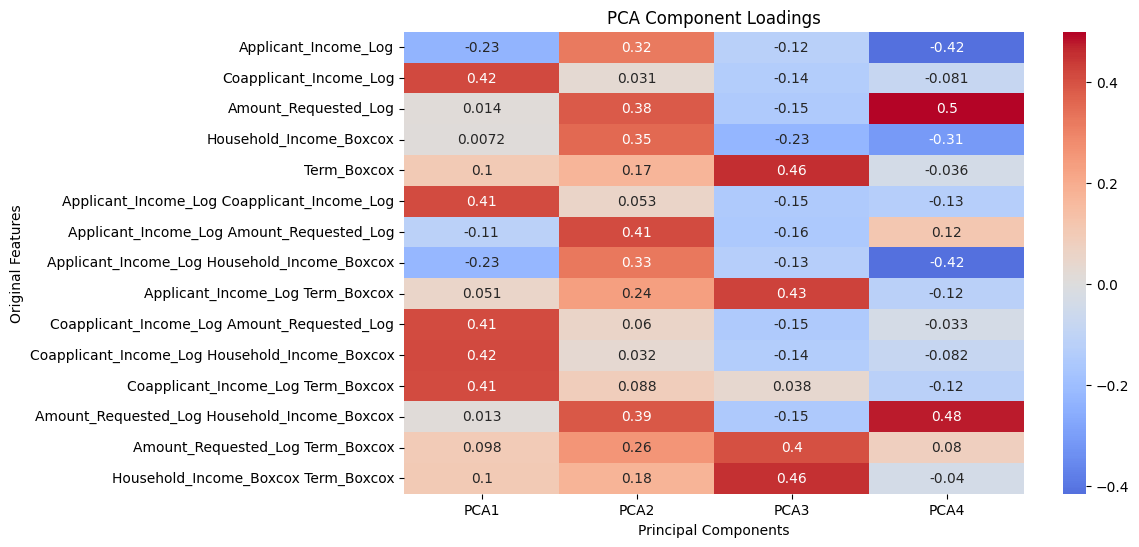

In [ ]:
# Visualise loadings
plt.figure(figsize=(10, 6))
sns.heatmap(pca_loadings.T, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.ylabel('Original Features')
plt.xlabel('Principal Components')
plt.show()

Component loadings summary:

PCA 1 loading:
* Applicant_Income_Log
* Amount_Requested_Log
* Household_Income_Boxcox
* Applicant_Amount_Requested_Interaction
* Applicant_Household_Interaction
* Amount_Household_Interaction

PCA 2 loading:
* Coaaplicant_Income_Log
* Amount_Requested_Log
* Household_Income_Boxcox
* Applicant_Coapplicant_Interaction
* Coapplicant_Amount_Requested_Interaction
* Coapplicant_Household_Interaction
* Amount_Household_Interaction

PCA 3 loading:
* Amount_Requested_Log
* Applicant_Amount_Requested_Interaction
* Amount_Household_Interaction

PCA 4 loading:
* Household_Income_Boxcox

Standardize the data: PCA is affected by the scale of the features, so
it's important to standardize the numerical columns.

Apply PCA: Start by specifying the number of components you want to keep. A good approach is to choose the number of components that explain a high percentage (e.g., 90-95%) of the variance.

Visualize: Plot the explained variance ratio to see how much variance is captured by each component.

Transform the data: Use PCA to reduce the dimensionality of your dataset based on the selected components.

## 3.4. Encoding and spliting data

**Encode variables accordingly to their types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Applicant_Income                                610 non-null    int64  
 7   Coapplicant_Income                              610 non-null    int64  
 8   Location                                        610 non-null    object 
 9   Amount_Requested                           

In [ ]:
# 'Credit_History' as nominal variable
df['Credit_History'] = df['Credit_History'].astype(str)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define nominal, ordinal, and numerical columns
nominal_cols = ['Gender',
                'Marital_Status',
                'Education_Level',
                'Independent_Worker',
                'Location',
                'Credit_History']

ordinal_cols = ['Number_of_Dependents']

# Edit to choose different set of numerical variables
# 'Amount_Requested_Log', 'Household_Income_Boxcox', 'PCA1', 'PCA2', 'PCA3', 'PCA4',...
numerical_cols = ['PCA1', 'PCA2', 'PCA3', 'PCA4']

In [ ]:
# Apply One-Hot Encoding for Nominal Variables
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_nominal_encoded = onehot_encoder.fit_transform(df[nominal_cols])

In [ ]:
# Apply Label Encoding for Ordinal Variables
label_encoder = LabelEncoder()
X_ordinal_encoded = df[ordinal_cols].copy()  # Create a copy to avoid changing original DataFrame
for col in ordinal_cols:
    X_ordinal_encoded[col] = label_encoder.fit_transform(X_ordinal_encoded[col])

In [ ]:
# Copy numerical variables
X_numerical = df[numerical_cols].copy()

In [ ]:
# Convert all encoded/scaled features back to DataFrame
X_nominal_df = pd.DataFrame(X_nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))
X_ordinal_df = pd.DataFrame(X_ordinal_encoded, columns=ordinal_cols)

In [ ]:
# Concatenate all features into one DataFrame
X_encoded = pd.concat([X_nominal_df, X_ordinal_df, X_numerical], axis=1)

In [ ]:
# Print the first few rows of the final encoded data frame
print(X_encoded.head())

   Gender_Male  Marital_Status_Yes  Education_Level_Not Graduate  Independent_Worker_Yes  Location_Semiurban  Location_Urban  Credit_History_1.0  Number_of_Dependents      PCA1      PCA2      PCA3      PCA4
0          1.0                 1.0                           0.0                     0.0                 0.0             0.0                 1.0                     0 -3.671272 -0.002726 -4.308083  0.311463
1          1.0                 1.0                           0.0                     0.0                 0.0             0.0                 1.0                     2  2.176642 -1.495626  0.513913  0.295157
2          1.0                 1.0                           0.0                     0.0                 0.0             1.0                 1.0                     0  1.838160  0.740595 -0.341926 -0.735595
3          1.0                 0.0                           1.0                     0.0                 0.0             1.0                 1.0                     0 -2.61

In [ ]:
# Define your the variable
y = df['Approval_Status']

In [ ]:
# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

**Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Check training and testing datasets
print('Shape of training datasets:', X_train.shape, y_train.shape)
print('Shape of testing datasets:', X_test.shape, y_test.shape)

Shape of training datasets: (488, 12) (488,)
Shape of testing datasets: (122, 12) (122,)


## 3.5. Balancing training data using SMOTE

In [ ]:
# Applying SMOTE to the training data
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Check the class distribution after SMOTE
print("Classes (Approval: 0 = No, 1 = Yes) distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Classes (Approval: 0 = No, 1 = Yes) distribution after SMOTE:
1    334
0    334
Name: count, dtype: int64


In [ ]:
print('Data sets information:')
print(X_train_balanced.info())
print(pd.Series(y_train_balanced).info())
print(X_test.info())
print(pd.Series(y_test).info())
print('\n')
print('Data sets shapes:')
print(X_train_balanced.shape)
print(y_train_balanced.shape)
print(X_test.shape)
print(y_test.shape)


Data sets information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender_Male                   668 non-null    float64
 1   Marital_Status_Yes            668 non-null    float64
 2   Education_Level_Not Graduate  668 non-null    float64
 3   Independent_Worker_Yes        668 non-null    float64
 4   Location_Semiurban            668 non-null    float64
 5   Location_Urban                668 non-null    float64
 6   Credit_History_1.0            668 non-null    float64
 7   Number_of_Dependents          668 non-null    int64  
 8   PCA1                          668 non-null    float64
 9   PCA2                          668 non-null    float64
 10  PCA3                          668 non-null    float64
 11  PCA4                          668 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 62

# 4. Predictive modeling and evaluation

**Objectives: Build models to address the business problem, Evaluate the model's performance in the banking context**

## 4.1. Implementing and training various ML algorithms

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold

In [ ]:
# Define models and methods
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(DecisionTreeClassifier(), n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
}

In [ ]:
# Define the evaluation function
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    return (model_name, accuracy, precision, recall, f1, roc_auc, fpr, tpr)

In [ ]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation and model evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics
results = []

for model_name, model in models.items():
    for train_index, test_index in kf.split(X_encoded):
        # Use iloc to index DataFrame by integer position for X_encoded
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]

        # Standard indexing for y_encoded (NumPy array)
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and collect results
        model_results = evaluate_model(model_name, model, X_test, y_test)
        results.append(model_results)

## 4.2. Evaluating model performance

In [ ]:
# Create DataFrame for Results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'FPR', 'TPR'])

In [ ]:
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      45 non-null     object 
 1   Accuracy   45 non-null     float64
 2   Precision  45 non-null     float64
 3   Recall     45 non-null     float64
 4   F1 Score   45 non-null     float64
 5   AUC        45 non-null     float64
 6   FPR        45 non-null     object 
 7   TPR        45 non-null     object 
dtypes: float64(5), object(3)
memory usage: 2.9+ KB
None


In [ ]:
# Filter to include only numeric columns
numeric_columns = results_df.select_dtypes(include=['float64']).columns
# Aggregate results to get the mean values
summary_results = results_df.groupby('Model')[numeric_columns].mean().reset_index()
print(summary_results)

                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0                AdaBoost  0.813115   0.810813  0.951983  0.874105  0.793116
1                 Bagging  0.801639   0.815434  0.920868  0.863761  0.808983
2           Decision Tree  0.736066   0.816471  0.796758  0.805047  0.698486
3    Gaussian Naive Bayes  0.804918   0.795832  0.963937  0.870803  0.750914
4       Gradient Boosting  0.808197   0.812802  0.937558  0.869587  0.792665
5     K-Nearest Neighbors  0.711475   0.731043  0.916275  0.812344  0.665703
6     Logistic Regression  0.809836   0.792601  0.980662  0.875984  0.766419
7           Random Forest  0.804918   0.812283  0.932708  0.867089  0.817000
8  Support Vector Machine  0.791803   0.779066  0.973595  0.864703  0.736844


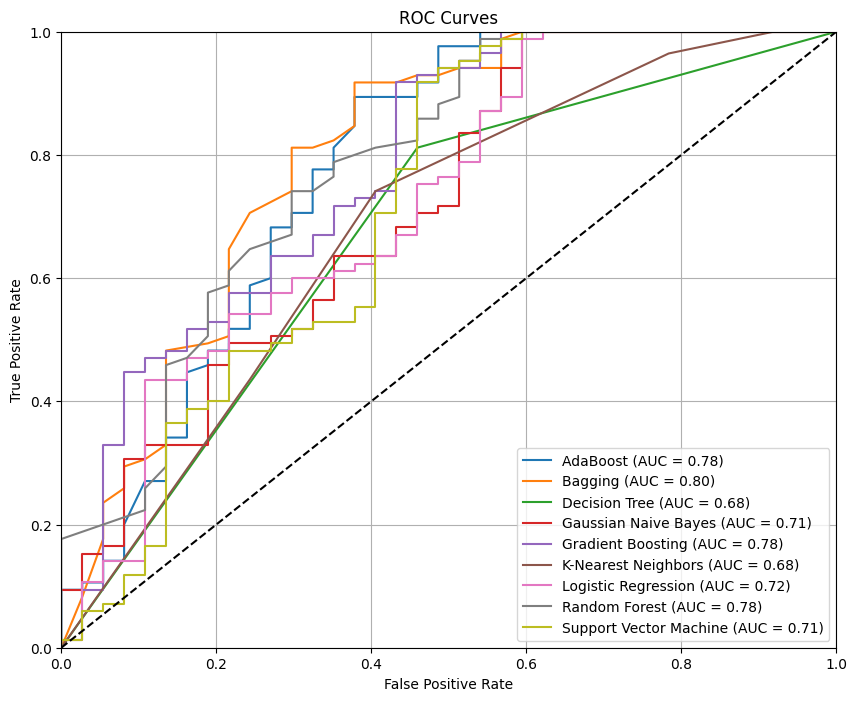

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

for model_name in summary_results['Model']:
    # Extract FPR and TPR for each model
    fpr = results_df[results_df['Model'] == model_name]['FPR'].values[0]
    tpr = results_df[results_df['Model'] == model_name]['TPR'].values[0]
    roc_auc = results_df[results_df['Model'] == model_name]['AUC'].values[0]

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 4.3. Comparing models

Bagging (AUC = 0.8) seems to be the best model. However, the results of the models above are quite close to each other. Therefore, hyperparameter tuning is necessary.

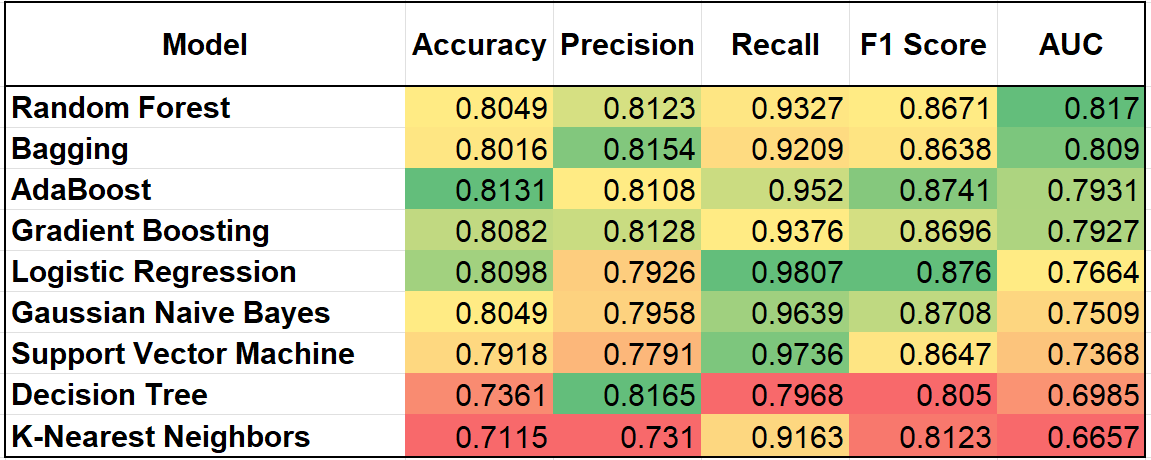

* AdaBoost: This model has the highest accuracy (0.8131) and a good balance between precision (0.8108) and recall (0.9520), indicating it effectively identifies true positives while maintaining a reasonable level of false positives. Its F1 score (0.8741) and AUC (0.7931) further reinforce its reliability.

* Bagging: This model performs closely to AdaBoost, with an accuracy of 0.8016 and slightly higher precision (0.8154), but lower recall (0.9209). This suggests that while it’s effective at reducing false positives, it might miss some true positives. The F1 score (0.8638) and AUC (0.8090) indicate solid performance, particularly in situations where precision is prioritized.

* Decision Tree: This model shows the lowest accuracy (0.7361) and F1 score (0.8050), despite high precision (0.8165). The recall (0.7968) indicates that it struggles with identifying true positives. The AUC (0.6985) suggests that it may not be as robust in distinguishing between classes compared to others.

* Gaussian Naive Bayes: With an accuracy of 0.8049 and the highest recall (0.9639), this model is very effective at detecting positive cases. However, it has lower precision (0.7958), indicating a higher rate of false positives. The F1 score (0.8708) suggests it performs reasonably well overall, while the AUC (0.7509) indicates moderate discriminatory power.

* Gradient Boosting: This model shows an accuracy of 0.8082 and maintains a good balance with a precision of 0.8128 and recall of 0.9376, resulting in an F1 score of 0.8696. The AUC (0.7927) demonstrates that it is fairly capable of distinguishing classes.

* K-Nearest Neighbors: This model has the lowest accuracy (0.7115) and F1 score (0.8123), with low precision (0.7310) and decent recall (0.9163). The AUC (0.6657) suggests that it is less effective in distinguishing between classes, making it less reliable for the task.

* Logistic Regression: This model achieves an accuracy of 0.8098, with a strong recall (0.9807) and a competitive F1 score (0.8760), indicating a strong ability to identify true positives while keeping false positives at a reasonable level. The AUC (0.7664) demonstrates moderate performance in distinguishing classes.

* Random Forest: The model exhibits an accuracy of 0.8049, with a precision of 0.8123 and recall of 0.9327, indicating that it has a good balance of performance metrics. Its F1 score (0.8671) and AUC (0.8170) suggest it is one of the better models, capable of robust predictions.

* Support Vector Machine: While having a reasonable accuracy (0.7918) and decent recall (0.9736), its precision (0.7791) is lower, indicating a tendency towards false positives. The AUC (0.7368) suggests that it might not be as strong as some of the other models in class separation.

## 4.4. Hyperparamet tuning

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Hyperparameter tuning using GridSearchCV

def hypertune_models(X_train, y_train):
    # Define hyperparameter grids for each model
    param_grids = {
        "KNN": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1: Manhattan, 2: Euclidean
        },
        "Decision Tree": {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        },
        "Random Forest": {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        "Logistic Regression": {
            'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
            'solver': ['liblinear', 'lbfgs'],  # 'lbfgs' for multi-class problems
            'max_iter': [100, 200, 300]
        },
        "Gaussian Naive Bayes": {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        },
        "Support Vector Machine": {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        },
        "Gradient Boosting": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        "AdaBoost": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "Bagging": {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        }
    }

    # Models to tune
    models = {
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Gaussian Naive Bayes": GaussianNB(),
        "Support Vector Machine": SVC(probability=True),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm='SAMME'),
        "Bagging": BaggingClassifier()
    }

    best_models = {}

    # Loop over each model and perform GridSearchCV
    for model_name, model in models.items():
        print(f"Hypertuning {model_name}...")
        grid_search = GridSearchCV(
            model,
            param_grids[model_name],
            cv=5,  # 5-fold cross-validation
            scoring='accuracy',
            n_jobs=-1,  # Use all available processors
            verbose=1  # Print progress
        )
        grid_search.fit(X_train, y_train)

        # Save the best model with optimal hyperparameters
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best CV score for {model_name}: {grid_search.best_score_:.4f}\n")

    return best_models

In [ ]:
# Call the hypertuning function
best_models = hypertune_models(X_train_balanced, y_train_balanced)

Hypertuning KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best CV score for KNN: 0.8055

Hypertuning Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV score for Decision Tree: 0.7816

Hypertuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score for Random Forest: 0.8386

Hypertuning Logistic Regression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best CV score for Logistic Regression: 0.7412

Hypertuning Gaussian Naive Bayes...
Fitting 5 folds for each of 3 candidates

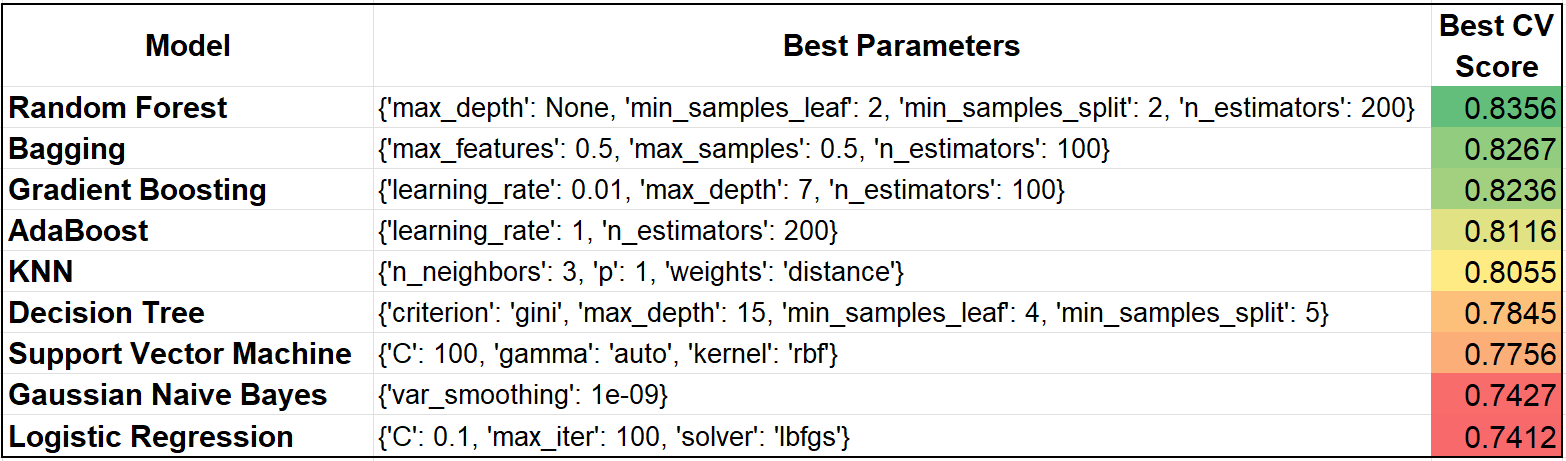

**Applying parameters back to models to train and evaluate again**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define models and methods
best_model = RandomForestClassifier(max_depth=10,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=200)

# Fit the model
best_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=10, n_estimators=200)



*   Random Forest (AUC = 0.83)
*   'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200



In [ ]:
# Save the Best Model for Deployment
import joblib

# Save the selected model for deployment
joblib.dump(best_model, 'best_model_rf.pkl')

['best_model_rf.pkl']

## 4.5. Feature extraction

In [ ]:
# Initialize feature importance dictionary for all features
feature_importances = {feature: 0.0 for feature in X_train_balanced.columns}

In [ ]:
# Loop through each estimator in the Bagging model
for i, feature in enumerate(X_train_balanced.columns):
    feature_importances[feature] += best_model.feature_importances_[i]

# Convert the feature importances to a DataFrame for better visualization
import pandas as pd
importance_df = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
6             Credit_History_1.0    0.332455
11                          PCA4    0.112954
9                           PCA2    0.110848
8                           PCA1    0.110764
10                          PCA3    0.106961
4             Location_Semiurban    0.052690
5                 Location_Urban    0.042395
1             Marital_Status_Yes    0.036148
7           Number_of_Dependents    0.032135
2   Education_Level_Not Graduate    0.023557
0                    Gender_Male    0.019589
3         Independent_Worker_Yes    0.019505


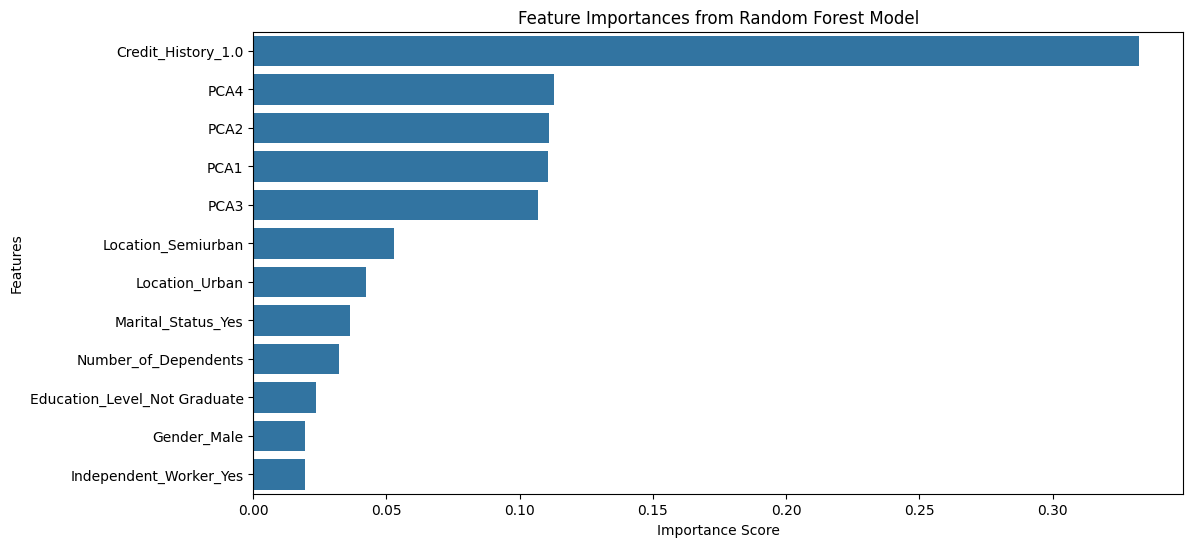

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Add title and labels
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Show the plot
plt.show()

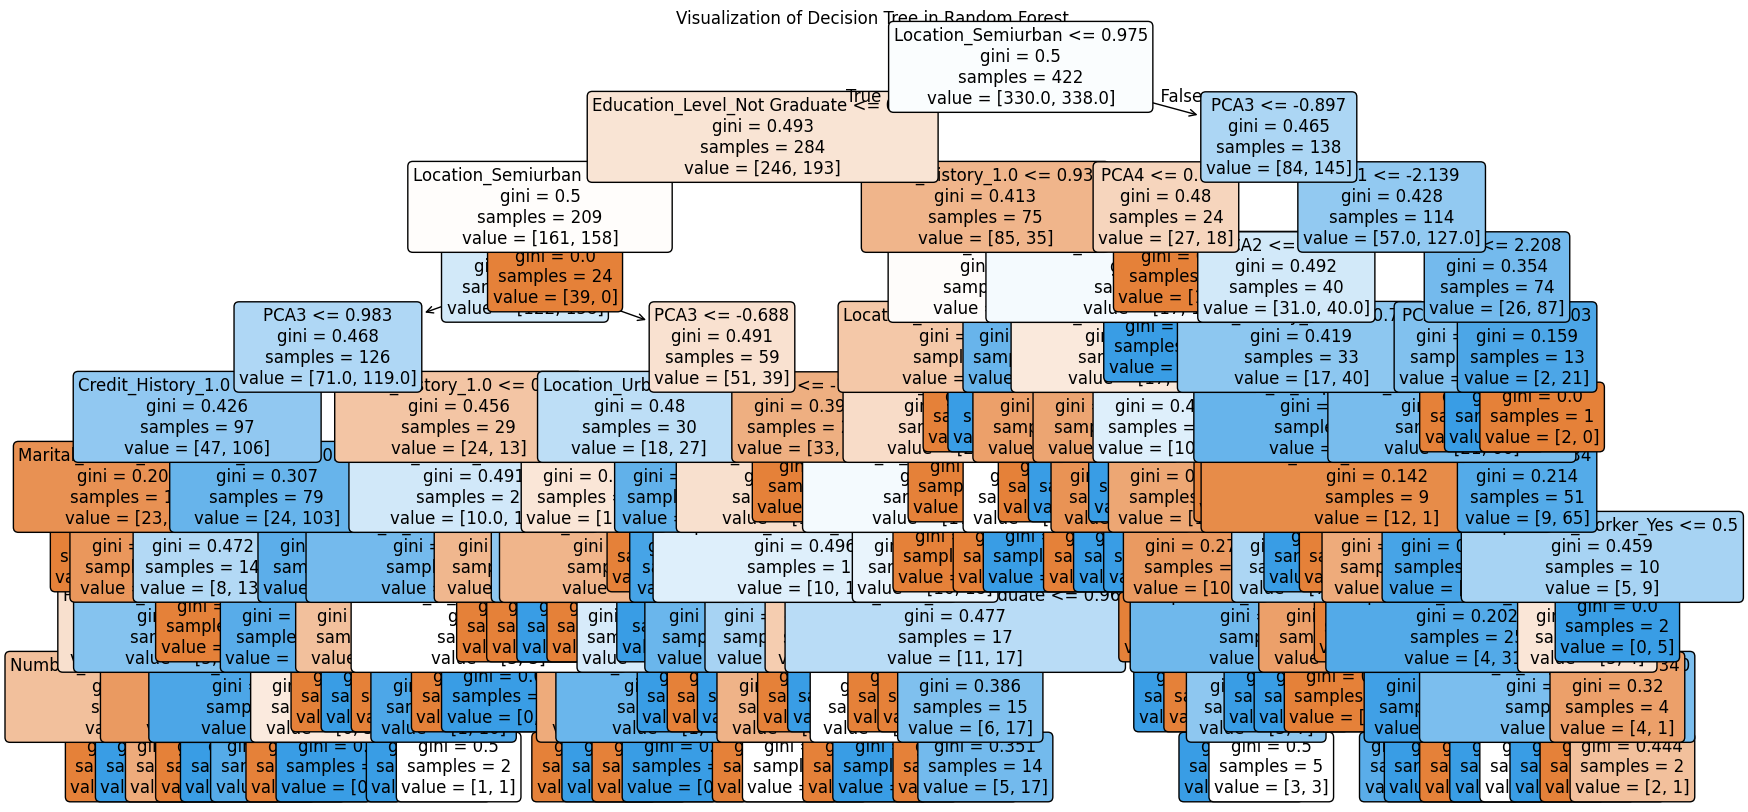

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a tree from the Random Forest model
# For example, let's take the first estimator
estimator = best_model.estimators_[0]

# Set up the plot
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=X_train_balanced.columns, rounded=True, fontsize=12)

# Display the plot
plt.title('Visualization of Decision Tree in Random Forest')
plt.show()

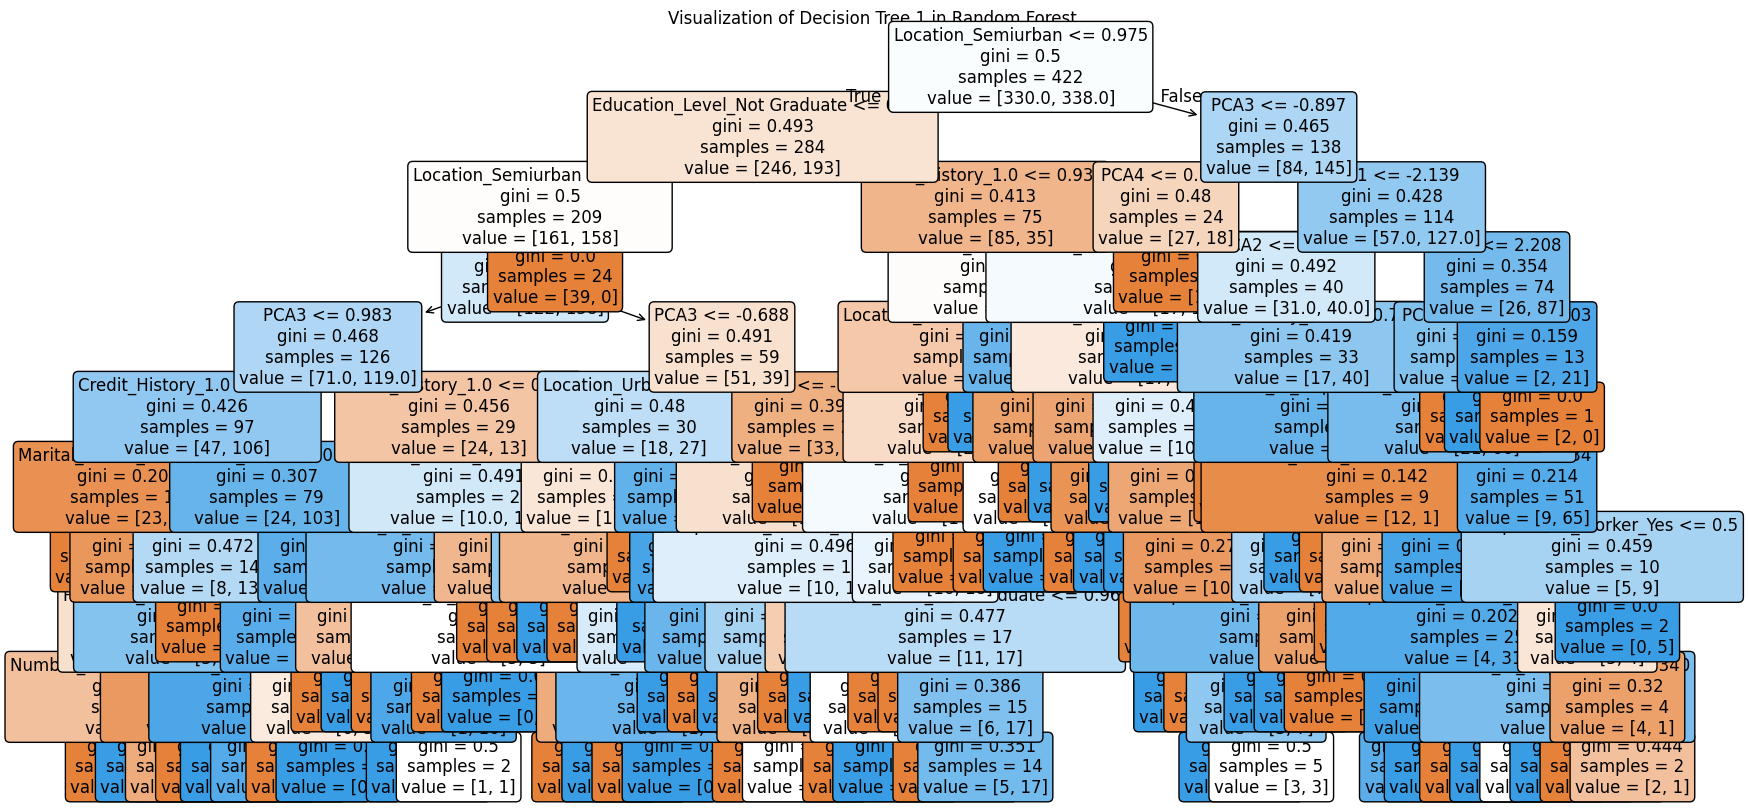

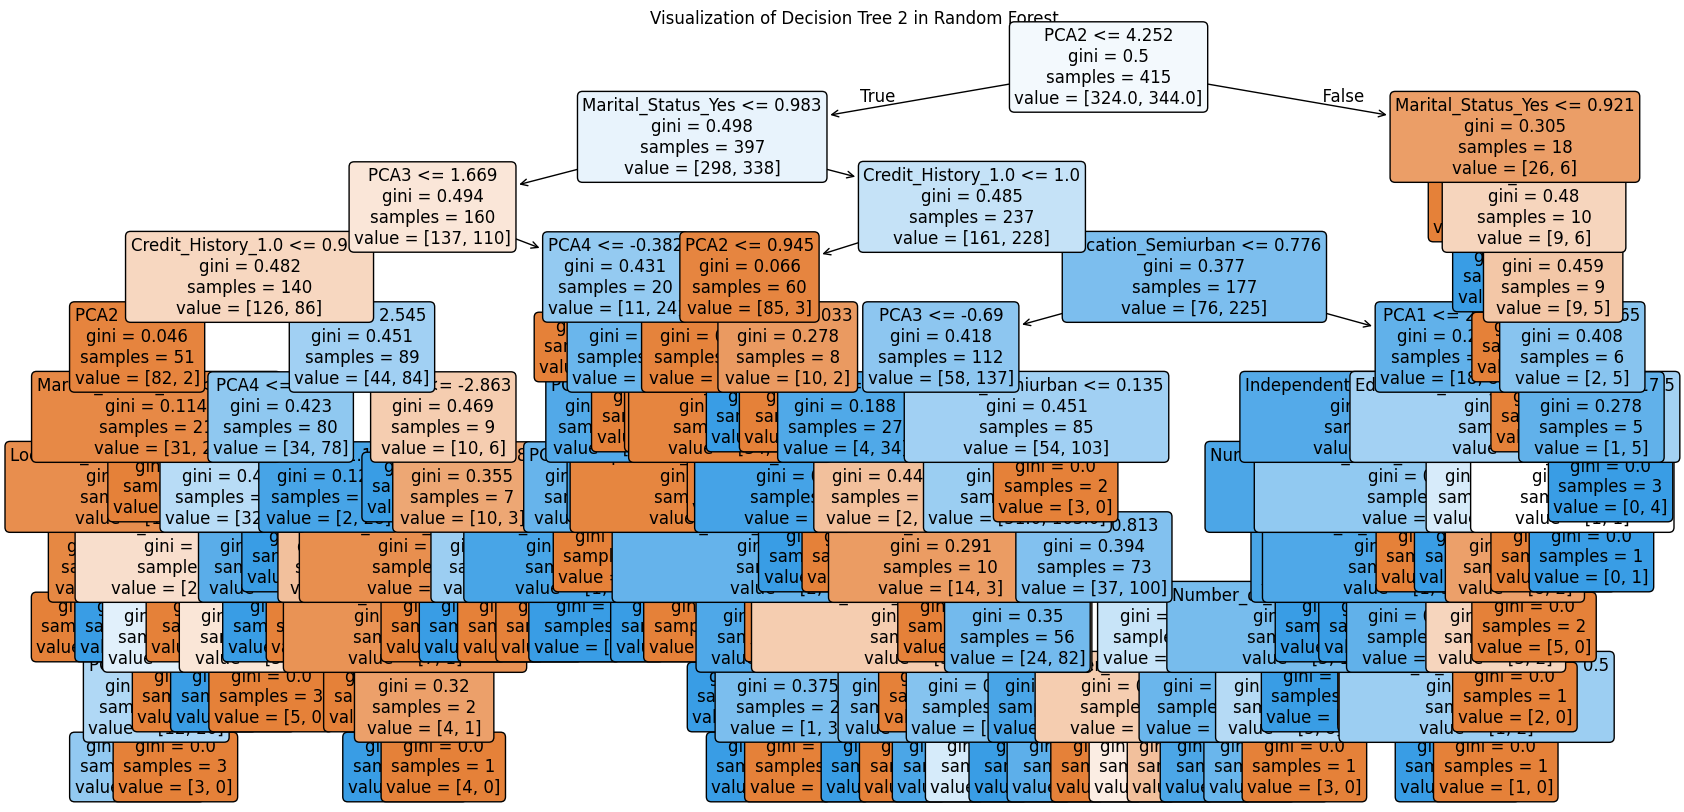

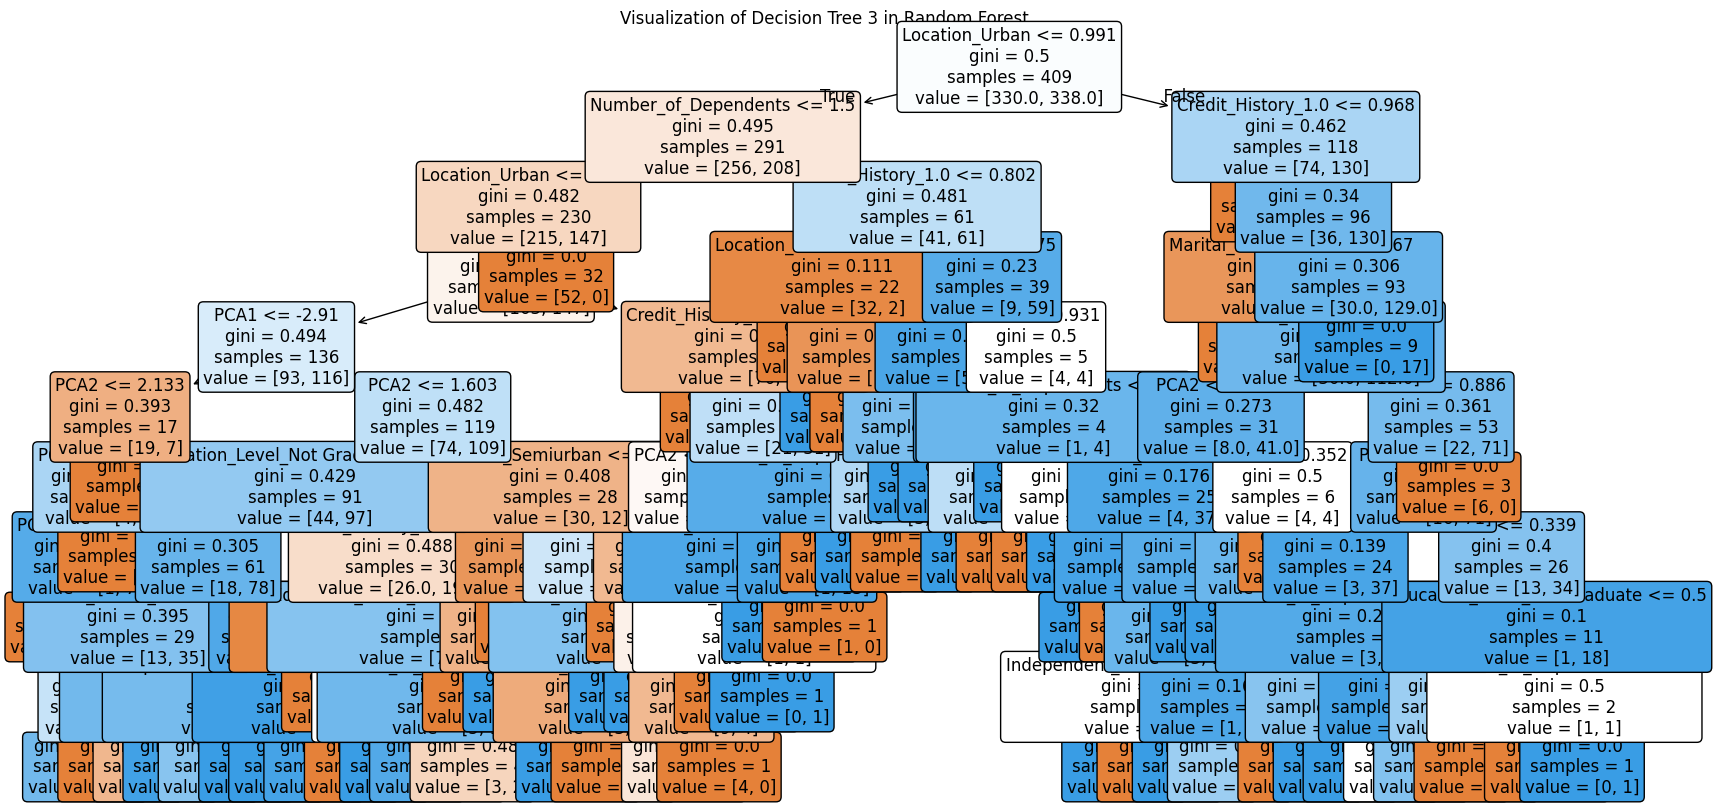

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Number of trees to visualize
num_trees_to_visualize = 3

# Loop through the first few trees
for i in range(num_trees_to_visualize):
    plt.figure(figsize=(20, 10))
    plot_tree(best_model.estimators_[i],
              filled=True,
              feature_names=X_train_balanced.columns,
              rounded=True,
              fontsize=12)
    plt.title(f'Visualization of Decision Tree {i+1} in Random Forest')
    plt.show()

In [ ]:
from sklearn.tree import export_text

# Extract rules from the first tree
tree_rules = export_text(estimator, feature_names=list(X_train_balanced.columns))

# Print the rules
print(tree_rules)

|--- Location_Semiurban <= 0.97
|   |--- Education_Level_Not Graduate <= 0.01
|   |   |--- Location_Semiurban <= 0.00
|   |   |   |--- PCA2 <= 1.18
|   |   |   |   |--- PCA3 <= 0.98
|   |   |   |   |   |--- Credit_History_1.0 <= 0.86
|   |   |   |   |   |   |--- Marital_Status_Yes <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Marital_Status_Yes >  0.50
|   |   |   |   |   |   |   |--- PCA3 <= -0.33
|   |   |   |   |   |   |   |   |--- PCA1 <= 1.05
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- PCA1 >  1.05
|   |   |   |   |   |   |   |   |   |--- Number_of_Dependents <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Number_of_Dependents >  2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- PCA3 >  -0.33
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Credit_History_1.0 >  0.86
|   |   |   

## 4.6. Model interpretation

#### 4.6.1. Applying SHAP

SHAP is compatible with ensemble models like Random Forests or Bagging classifiers. SHAP's TreeExplainer can be used on each individual estimator in the Bagging model, or it can approximate feature importances for the ensemble directly.

In [ ]:
!pip install shap

In [ ]:
import shap

# Initialize array to store aggregated SHAP values
shap_values_sum = np.zeros((X_test.shape[0], X_test.shape[1]))  # Same shape as X_test

In [ ]:
# Loop through each estimator in the Bagging model
for estimator in best_model.estimators_:
    explainer = shap.TreeExplainer(estimator)  # Create SHAP explainer for this estimator
    shap_values = explainer.shap_values(X_test)  # Compute SHAP values for the estimator

    # Check if the output is multi-class (shape has 3 dimensions)
    if len(shap_values.shape) == 3:
        # Average SHAP values across classes for binary classification
        shap_values_avg = np.mean(shap_values, axis=2)  # Average across classes
    else:
        shap_values_avg = shap_values  # If not multi-class, use as is

    # Add the averaged SHAP values for this estimator to the running total
    shap_values_sum += shap_values_avg

In [ ]:
# Average the SHAP values across all estimators
shap_values_avg_final = shap_values_sum / len(best_model.estimators_)

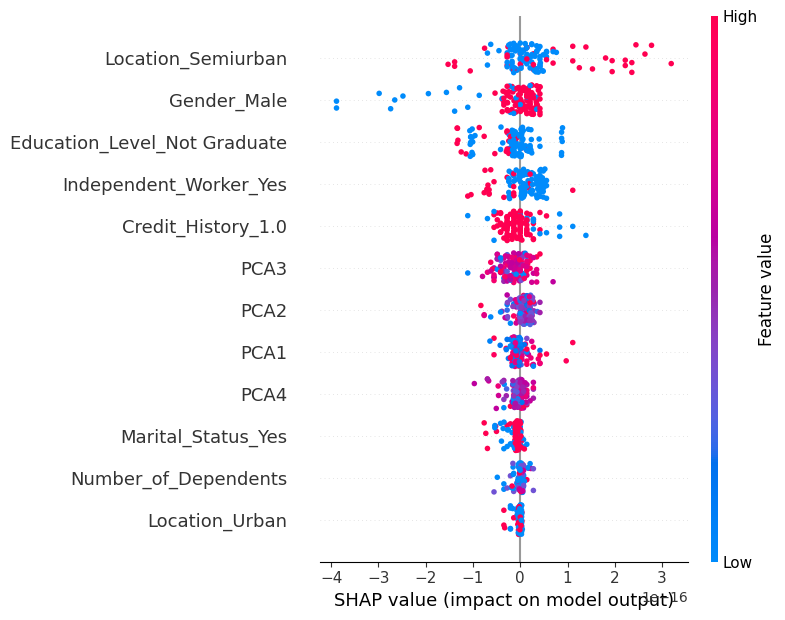

In [ ]:
# Plot the summary of averaged SHAP values
shap.summary_plot(shap_values_avg, X_test, feature_names=X_test.columns)

#### 4.6.2. Applying LIME

LIME works well with bagging models by approximating the decision boundary locally around a single prediction.

In [ ]:
!pip install lime

In [ ]:
from lime import lime_tabular

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns,
    class_names=['0', '1'],  # Adjust to your class names
    mode='classification'
)

In [ ]:
# Explain a specific instance
i = 0  # Index of the instance in X_test you want to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=best_model.predict_proba  # Using the bagging model for prediction
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Display LIME explanation in the notebook
# Show the explanation as HTML
html_exp = exp.as_html()
from IPython.core.display import display, HTML
display(HTML(html_exp))

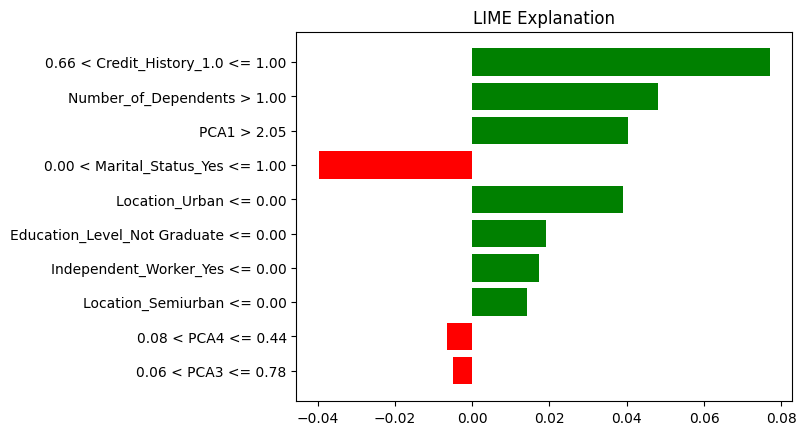

In [ ]:
# Plot the explanation
exp.as_pyplot_figure()
plt.title('LIME Explanation')
plt.show()

# 5. Model deployment and monitoring

**Objective: Implement the model in a real-world banking environment**

## 5.1. Deploying the chosen model

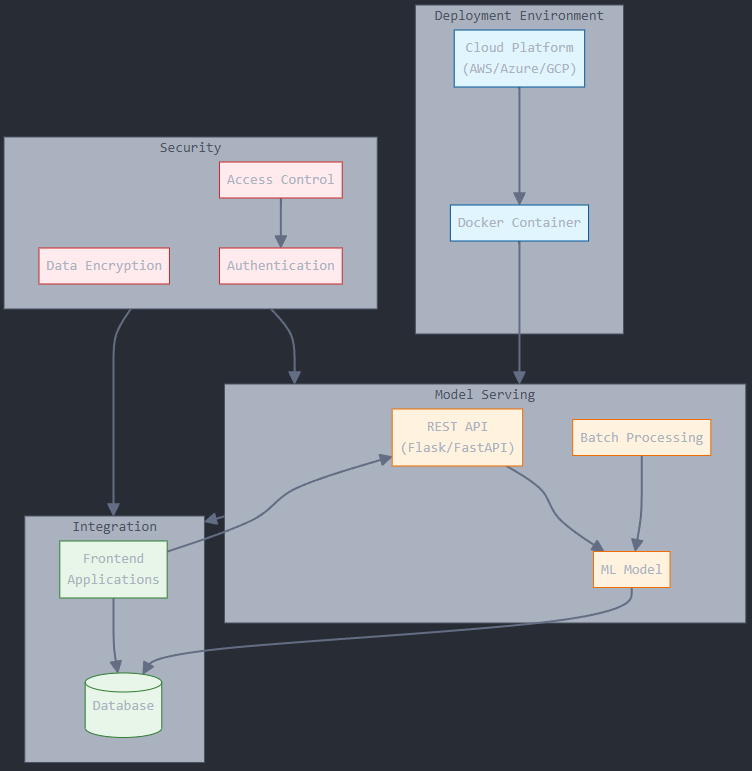

The deployment strategy involves several key components. First, in the Deployment Environment, you must choose a platform, deciding between on-premises or cloud options like AWS, Azure, or Google Cloud, with cloud solutions often providing better scalability and integration. Next, utilize Docker for Containerization to ensure consistency across development, staging, and production environments. For Model Serving, implement a REST API using frameworks such as Flask or FastAPI to allow the model to accept requests and return predictions. If real-time predictions are not essential, consider Batch Processing, where loan applications are collected and processed periodically, such as nightly. Integration with the bank's existing applications is crucial; update loan application forms to connect with the model's API and store input data and predictions in a database for auditing and compliance, adhering to regulations like GDPR. Lastly, ensure Security by encrypting sensitive data both in transit and at rest, and implement access control measures to authenticate and authorize users, ensuring only authorized personnel can access the model.

## 5.2. Monitor model performance

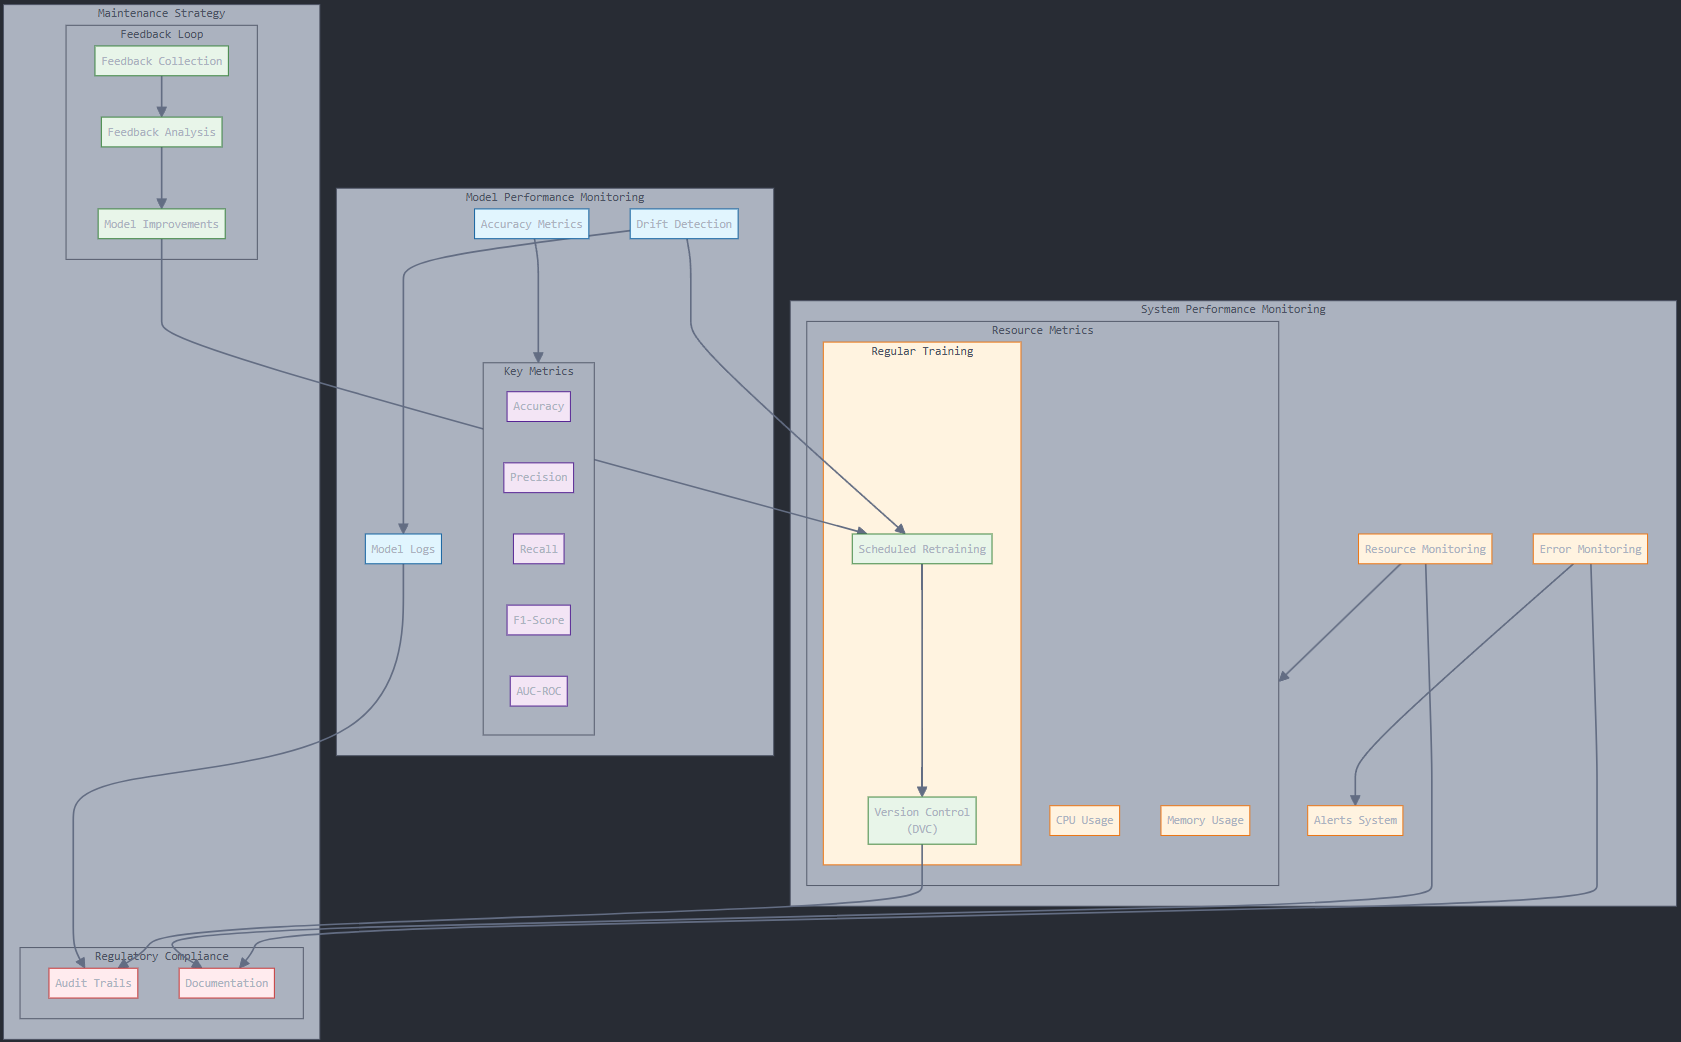

Monitoring performance and maintenance strategies are essential for ensuring the effectiveness and compliance of the model. For Model Performance Monitoring, continuously track accuracy metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to assess how well the model performs on live data. Implement techniques for Drift Detection to identify changes in data distribution or degradation in model performance using statistical tests or machine learning methods. Maintain logs of input data, predictions, and actual outcomes for performance analysis over time. In terms of System Performance Monitoring, regularly track CPU and memory usage, as well as API response times, using tools like Prometheus and Grafana for visualization and alerts. Error monitoring should also be established to log errors and exceptions, alerting on high error rates. Regarding the Maintenance Strategy, plan for Regular Retraining by scheduling intervals for retraining the model with fresh data—whether quarterly or when drift is detected—and utilize tools like DVC (Data Version Control) for managing model versions and tracking changes. Establish a User Feedback Loop by implementing a mechanism for loan officers to provide input on model predictions, which can help refine the model through parameter adjustments or feature set changes. Finally, ensure Regulatory Compliance by maintaining audit trails that document prediction processes, especially for sensitive applications like loans, and thoroughly document all processes, model versions, and changes to facilitate audits and ensure transparency.

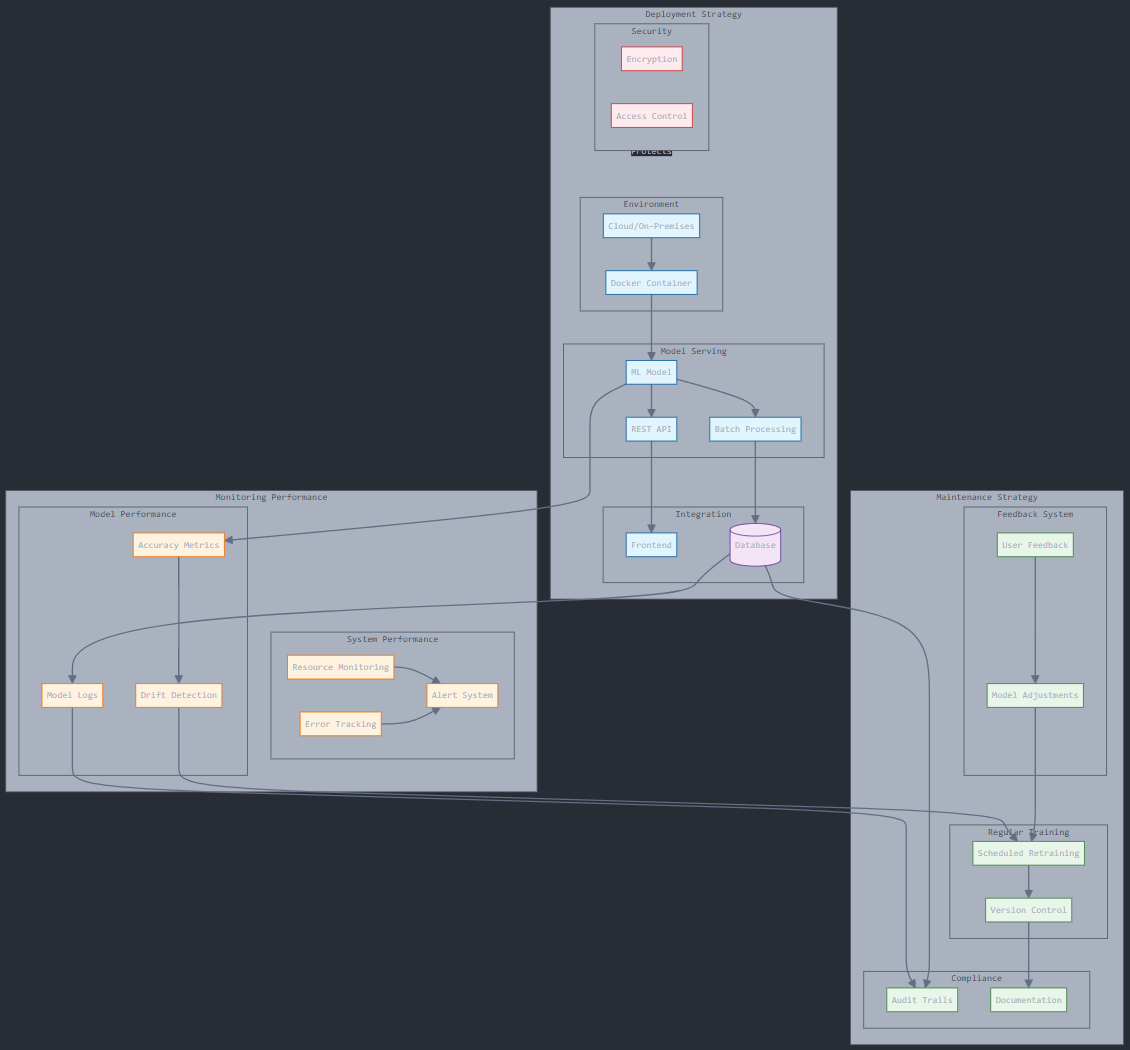

In conclusion, implementing a robust deployment strategy, coupled with vigilant performance monitoring and a proactive maintenance approach, is crucial for the successful integration of the bank loan approval classification model in a real-world banking environment. By leveraging cloud or on-premises platforms, utilizing containerization for consistency, and establishing secure API integrations, the model can effectively deliver accurate predictions. Continuous monitoring of both model and system performance, along with scheduled retraining and user feedback, ensures that the model remains relevant and effective over time. Furthermore, adhering to regulatory compliance through detailed documentation and audit trails safeguards the institution's integrity and builds trust with stakeholders. Overall, this comprehensive approach not only enhances the model's reliability but also supports the bank's mission to provide fair and efficient loan approval processes.

# Additional discussion

Additional Considerations from **"Designing Machine Learning Systems"** book:

When designing machine learning systems, several additional considerations play a pivotal role in ensuring long-term success and effectiveness. Firstly, data and model versioning is essential for maintaining reproducibility and facilitating debugging, enabling teams to trace back through versions to identify and rectify issues. Scalability is another critical aspect, as systems must accommodate increasing data volumes and user traffic; strategies such as distributed training and model optimization can be implemented to enhance scalability. Moreover, maintainability should not be overlooked, with an emphasis on code modularity, thorough documentation, and robust testing to support system longevity and ease of updates. Adaptability is also vital; machine learning systems must be designed to evolve with changing environments and business needs, necessitating continual learning techniques and retraining strategies to keep models relevant. Finally, the principle of responsible AI underscores the importance of addressing potential biases, ensuring fairness, and promoting accountability and transparency throughout the machine learning lifecycle. By considering these factors, organizations can build resilient, effective, and ethical machine learning systems that thrive in dynamic environments.

# Reference

H. Cheung, A. Baumber, & P.J. Brown (2022). 'Barriers and enablers to sustainable finance: A case study of home loans in an Australian retail bank'. Journal of Cleaner Production. Volume 334, 2022, 130211. ISSN 0959-6526. https://doi.org/10.1016/j.jclepro.2021.130211.

Zhang, Y., & Deng, W. (2019). Regressing Analysis for Factors Affecting British Loan Approval. World Scientific Research Journal, 5(7), 133-140. https://doi.org/10.6911/WSRJ.201907_5(7).0022

Bangura, M. & Lee, C. L. (2023). 'Urbanisation and housing finance nexus: Evidence from Australia'. Habitat International. Volume 139, 2023, 102897. ISSN 0197-3975. https://doi.org/10.1016/j.habitatint.2023.102897.

ABS n.d. "Families and family composition". Accessed on 21 October 2024. Retrieved from: https://aifs.gov.au/research/facts-and-figures/families-and-family-composition#:~:text=Over%20the%20three%20censuses%2C%20couples,(20%25%E2%80%9322%25).

# Appendix

## A. Analysis of outliers detected by IQR and Isolation Forest

In [ ]:
# Read the uploaded CSV file into a DataFrame
combined_outliers = pd.read_csv('combined_outliers.csv')

In [ ]:
# Summary Statistics
print(combined_outliers.describe())

       Number_of_Dependents  Applicant_Income  Coapplicant_Income  Amount_Requested        Term  Credit_History  Household_Income
count            303.000000        303.000000          303.000000        303.000000  303.000000      303.000000        303.000000
mean               1.059406      13123.303630         3455.422442        254.367987  297.821782        0.848185      16578.726073
std                1.131913      14352.863408         7016.020964        169.725096  109.606194        0.359435      14248.627694
min                0.000000        417.000000            0.000000         17.000000   12.000000        0.000000       2181.000000
25%                0.000000       3644.500000            0.000000        120.500000  180.000000        1.000000       7510.000000
50%                1.000000       9319.000000            0.000000        188.000000  360.000000        1.000000      13652.000000
75%                2.000000      16594.500000         4259.500000        359.000000  360.0

In [ ]:
# Count of Outliers
outlier_counts = combined_outliers['Outlier_Method'].value_counts()
print(outlier_counts)

Outlier_Method
IQR                 248
Isolation Forest     55
Name: count, dtype: int64


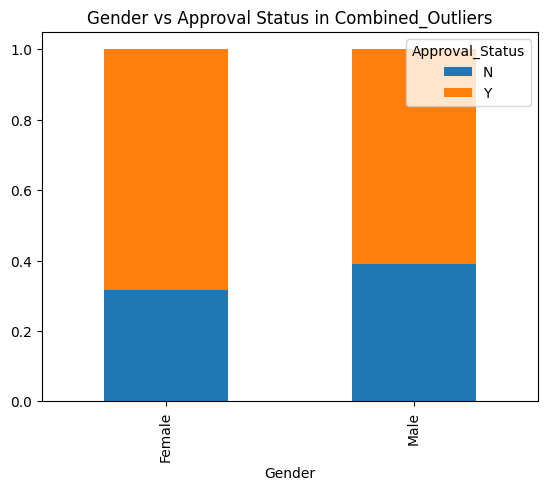

In [ ]:
### Bivariate Analysis: Gender vs Approval Status in Combined_Outliers
# Crosstab
pd.crosstab(combined_outliers['Gender'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Gender'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Gender vs Approval Status in Combined_Outliers')
plt.show()

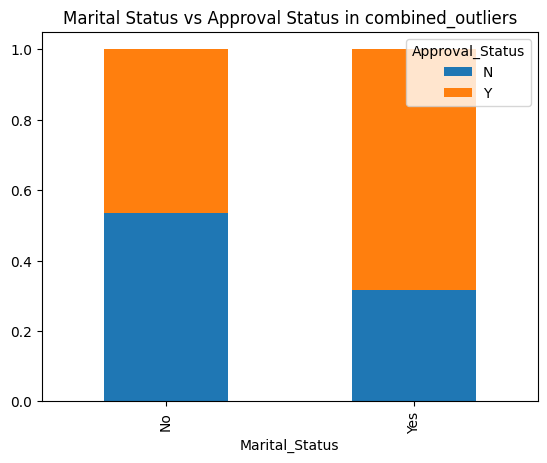

In [ ]:
### Bivariate Analysis: Gender vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Marital_Status'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Marital_Status'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Marital Status vs Approval Status in combined_outliers')
plt.show()

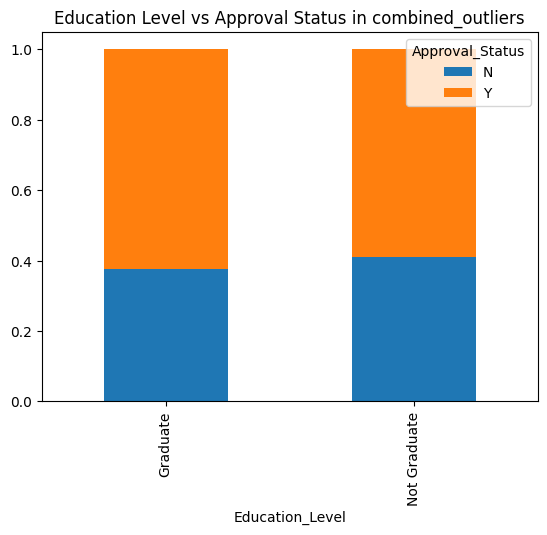

In [ ]:
### Bivariate Analysis: Education Level vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Education_Level'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Education_Level'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Education Level vs Approval Status in combined_outliers')
plt.show()

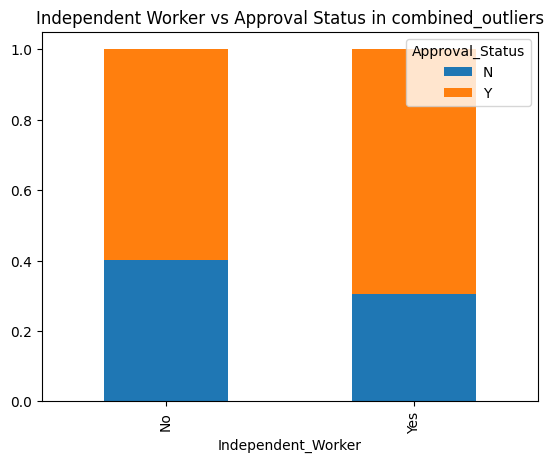

In [ ]:
### Bivariate Analysis: Independent Worker vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Independent_Worker'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Independent_Worker'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Independent Worker vs Approval Status in combined_outliers')
plt.show()

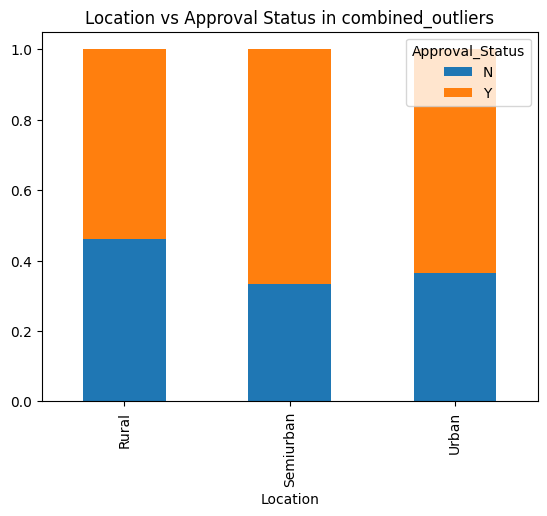

In [ ]:
### Bivariate Analysis: Location vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Location'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Location'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Location vs Approval Status in combined_outliers')
plt.show()

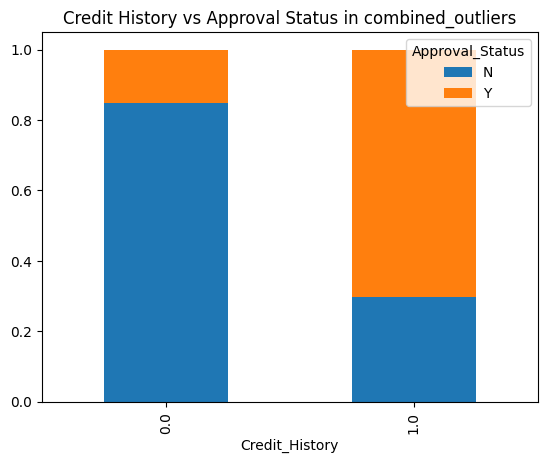

In [ ]:
### Bivariate Analysis: Credit History vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Credit_History'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Credit_History'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Credit History vs Approval Status in combined_outliers')
plt.show()

**Ordinal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

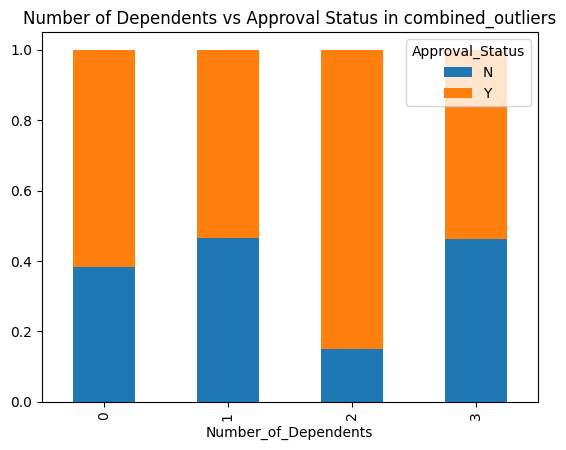

In [ ]:
### Bivariate Analysis: Number of Dependents vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Number_of_Dependents'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Number_of_Dependents'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Number of Dependents vs Approval Status in combined_outliers')
plt.show()

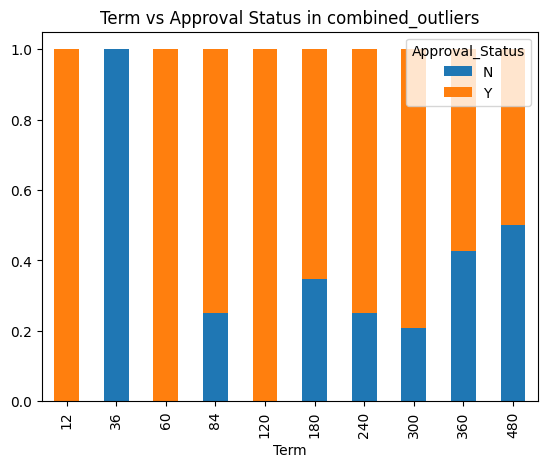

In [ ]:
### Bivariate Analysis: Term vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Term'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Term'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Term vs Approval Status in combined_outliers')
plt.show()

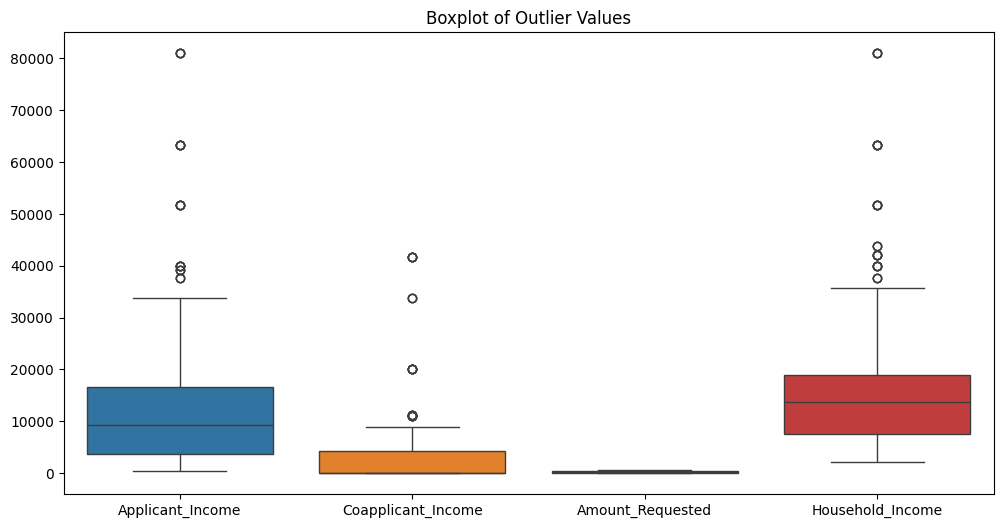

In [ ]:
# Box plots to visualize the spread of data and identify how outliers deviate from the rest
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Household_Income']
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_outliers[numerical_columns])
plt.title('Boxplot of Outlier Values')
plt.show()

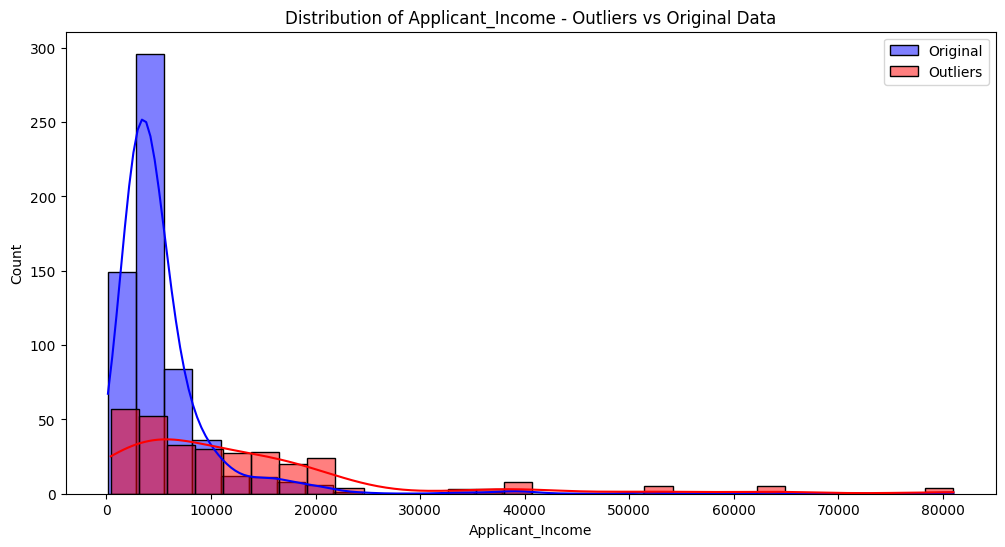

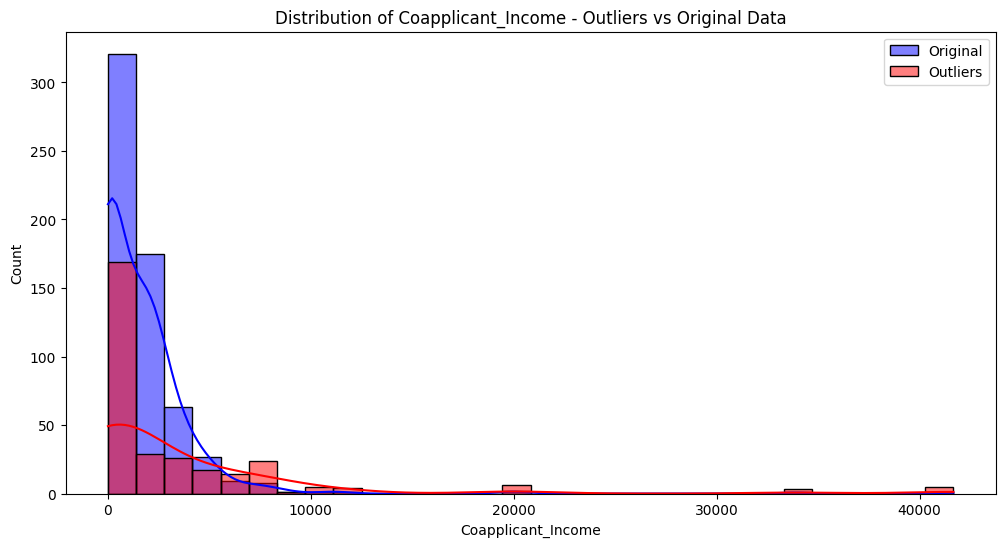

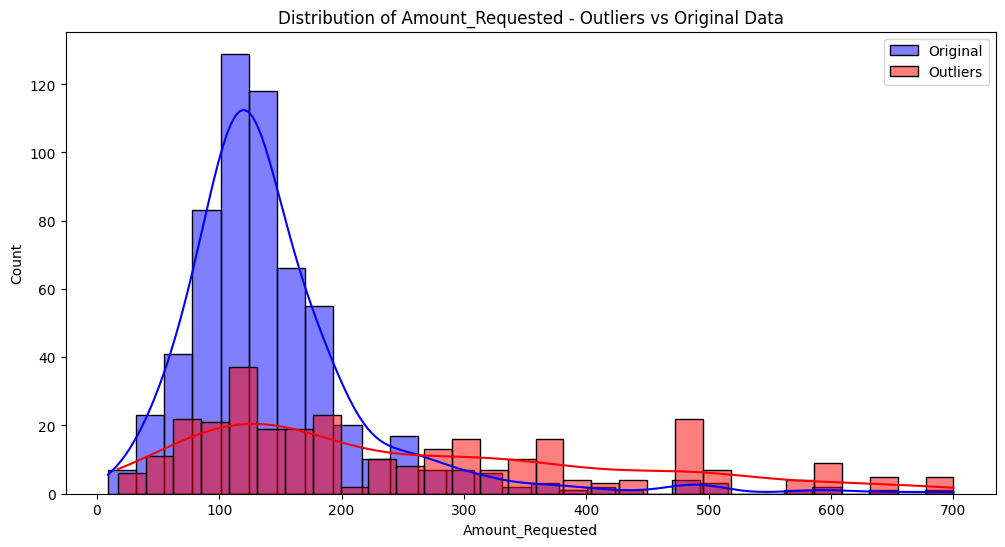

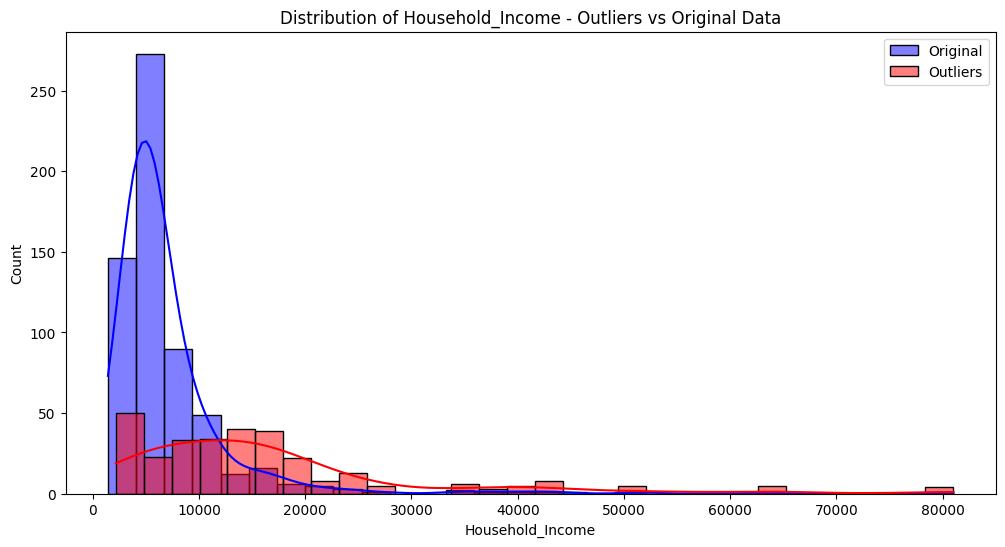

In [ ]:
# Histograms for the numeric variables to visualize the distribution of outlier values compared to the entire dataset
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True, label='Original', color='blue', alpha=0.5)
    sns.histplot(combined_outliers[column], bins=30, kde=True, label='Outliers', color='red', alpha=0.5)
    plt.title(f'Distribution of {column} - Outliers vs Original Data')
    plt.legend()
    plt.show()

In [ ]:
# Group Analysis (Group by Outlier Method)
method_analysis = combined_outliers.groupby('Outlier_Method').mean(numeric_only=True)
print(method_analysis)

                  Number_of_Dependents  Applicant_Income  Coapplicant_Income  Amount_Requested        Term  Credit_History  Household_Income
Outlier_Method                                                                                                                              
IQR                           1.032258      13005.798387         3222.217742        251.893145  303.629032        0.838710      16228.016129
Isolation Forest              1.181818      13653.145455         4506.963636        265.527273  271.636364        0.890909      18160.109091


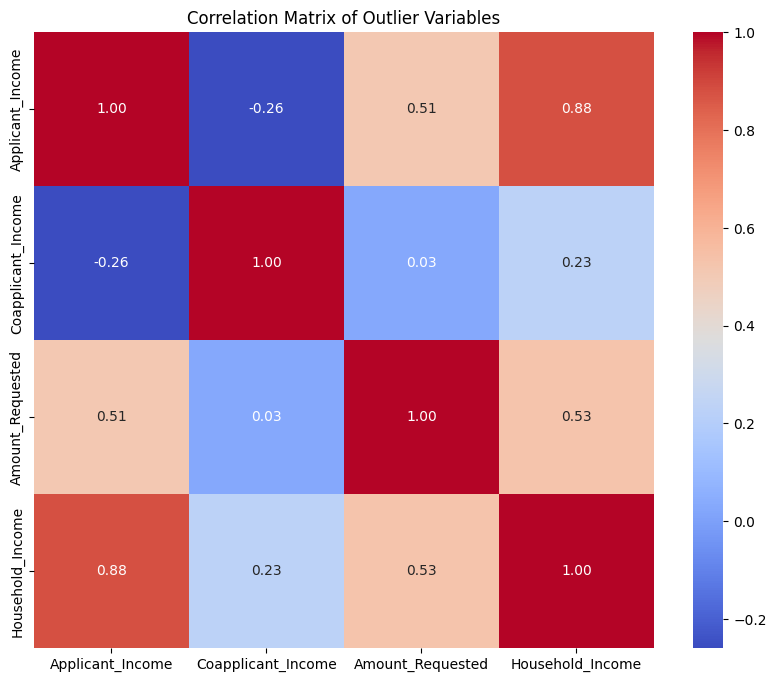

In [ ]:
# Correlation Analysis
correlation_matrix = combined_outliers[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Outlier Variables')
plt.show()

In [ ]:
# Comparative Analysis
original_stats = df[numerical_columns].describe()
outlier_stats = combined_outliers[numerical_columns].describe()
comparison = pd.concat([original_stats, outlier_stats], axis=1, keys=['Original', 'Outliers'])
print(comparison)

              Original                                                              Outliers                                                     
      Applicant_Income Coapplicant_Income Amount_Requested Household_Income Applicant_Income Coapplicant_Income Amount_Requested Household_Income
count       610.000000         610.000000       610.000000       610.000000       303.000000         303.000000       303.000000       303.000000
mean       5415.578689        1622.114754       145.900000      7037.693443     13123.303630        3455.422442       254.367987     16578.726073
std        6126.143268        2935.113192        84.384494      6477.841166     14352.863408        7016.020964       169.725096     14248.627694
min         147.000000           0.000000         9.000000      1440.000000       417.000000           0.000000        17.000000      2181.000000
25%        2882.750000           0.000000       101.000000      4168.250000      3644.500000           0.000000       120.50